In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
#inport data

In [3]:
X,y = load_boston()['data'], load_boston()['target']

In [4]:
X.shape, y.shape

((506, 13), (506,))

In [5]:
#1.create simple SG

In [6]:
class simple_gd(object):
    
    def __init__(self, eta = 0.005, n_iters = 10, val_size = 0.2, lambda_ = 0.95, minibatch_size = 32):
        self.eta = eta
        self.n_iters = n_iters
        self.val_size = val_size
        self.lambda_ = lambda_
        self.minibatch_size = minibatch_size
        
    def fit(self,X,y):
        #generate firstly train and val data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = self.val_size)
        self.m_ = len(X_train)
        #initialize the theta matrix
        theta = np.random.randn(X_train.shape[1],1)
        #create container for gathering error
        error_cont = []
        self.val_error_cont = []
        #loop until iter
        print(f'operation starts now for {self.n_iters} epochs')
        self.i = 0        
        while(self.i!= self.n_iters):
            print('-'*10)
            k =0 
            for j in range(int(self.m_/self.minibatch_size)):
                print(f'minibatch:{j}/{int(self.m_/self.minibatch_size)}')
                np.random.seed(np.random.randint(0,500))
                np.random.shuffle(X_train)
                np.random.shuffle(y_train)
                x_train_sub = X_train[k:k+self.minibatch_size,:]
                y_train_sub  = y_train[k:k+self.minibatch_size,:]
                y_pred  = np.dot(x_train_sub,theta)
                error = self.mae_cal(y_pred,y_train_sub, m = len(y_train_sub))
                val_error = self.mae_cal(np.dot(X_test,theta),y_test, m=len(y_test) )
                error_cont.append(int(error))
                self.val_error_cont.append(int(val_error))
                # derivative of loss and new theta
                grads = np.dot(x_train_sub.T,(np.dot(x_train_sub,theta)-y_train_sub)) *(2/self.m_) + self.lambda_ * np.sign(theta) * (2/self.m_)
                theta -= self.eta * grads
                print(f'epoch:{self.i+1}--estimated_error:{error}--val_eror:{val_error}')    
                df = pd.DataFrame(error_cont, columns=['train_error'])
                df['val_error'] = self.val_error_cont
                k += self.minibatch_size
            plt.figure(figsize=(10,4))
            plt.plot(df.train_error, 'r',label = 'train')
            plt.plot(df.val_error, 'b', label ='val')
            plt.legend(loc = 'upper right')
            plt.show()    
            if self.early_finish():
                break
            self.i += 1
        return theta
        
    def mae_cal(self,y_pred,y_true, m):
        return sum(abs(y_pred - y_true))/m
    
    def early_finish(self,be_cool = 100):
        if self.i > be_cool:
            if self.val_error_cont[-10]/self.val_error_cont[-1] < 1.00005:
                print('early stopping is activated')
                return True
            
            

operation starts now for 5000 epochs
----------
minibatch:0/12
epoch:1--estimated_error:[730.25797912]--val_eror:[736.68309943]
minibatch:1/12
epoch:1--estimated_error:[682.09497102]--val_eror:[701.98158373]
minibatch:2/12
epoch:1--estimated_error:[669.74780605]--val_eror:[669.9755902]
minibatch:3/12
epoch:1--estimated_error:[632.70698119]--val_eror:[636.02737801]
minibatch:4/12
epoch:1--estimated_error:[608.60205761]--val_eror:[604.17497149]
minibatch:5/12
epoch:1--estimated_error:[590.51207429]--val_eror:[573.71487643]
minibatch:6/12
epoch:1--estimated_error:[547.27666145]--val_eror:[544.60213729]
minibatch:7/12
epoch:1--estimated_error:[600.26498566]--val_eror:[516.92842675]
minibatch:8/12
epoch:1--estimated_error:[482.8048819]--val_eror:[485.39086479]
minibatch:9/12
epoch:1--estimated_error:[495.08876207]--val_eror:[461.26782288]
minibatch:10/12
epoch:1--estimated_error:[445.72692929]--val_eror:[435.22115195]
minibatch:11/12
epoch:1--estimated_error:[416.34676032]--val_eror:[414.27

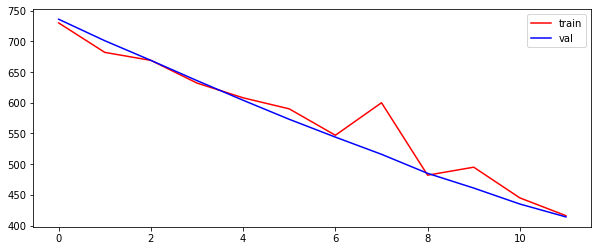

----------
minibatch:0/12
epoch:2--estimated_error:[438.89983254]--val_eror:[392.69127267]
minibatch:1/12
epoch:2--estimated_error:[366.4570323]--val_eror:[369.08156466]
minibatch:2/12
epoch:2--estimated_error:[338.02116838]--val_eror:[351.77570877]
minibatch:3/12
epoch:2--estimated_error:[336.73191653]--val_eror:[334.87107456]
minibatch:4/12
epoch:2--estimated_error:[354.74488296]--val_eror:[316.93202159]
minibatch:5/12
epoch:2--estimated_error:[325.32764815]--val_eror:[298.71311252]
minibatch:6/12
epoch:2--estimated_error:[291.99651104]--val_eror:[282.04110356]
minibatch:7/12
epoch:2--estimated_error:[293.63994161]--val_eror:[267.37030497]
minibatch:8/12
epoch:2--estimated_error:[238.13573843]--val_eror:[252.61082802]
minibatch:9/12
epoch:2--estimated_error:[220.00877901]--val_eror:[240.20585844]
minibatch:10/12
epoch:2--estimated_error:[229.17282651]--val_eror:[229.14265238]
minibatch:11/12
epoch:2--estimated_error:[192.44660048]--val_eror:[217.50160168]


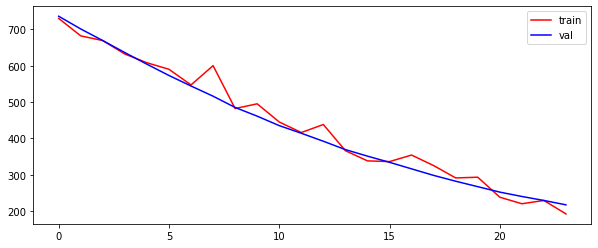

----------
minibatch:0/12
epoch:3--estimated_error:[187.45351668]--val_eror:[208.44171405]
minibatch:1/12
epoch:3--estimated_error:[205.05461136]--val_eror:[198.52094096]
minibatch:2/12
epoch:3--estimated_error:[163.06012995]--val_eror:[188.6783952]
minibatch:3/12
epoch:3--estimated_error:[148.7437043]--val_eror:[180.40595481]
minibatch:4/12
epoch:3--estimated_error:[176.02109038]--val_eror:[173.19708539]
minibatch:5/12
epoch:3--estimated_error:[158.00260009]--val_eror:[164.32924751]
minibatch:6/12
epoch:3--estimated_error:[166.27480063]--val_eror:[156.11360656]
minibatch:7/12
epoch:3--estimated_error:[149.17295823]--val_eror:[147.48153338]
minibatch:8/12
epoch:3--estimated_error:[114.66372165]--val_eror:[140.18427666]
minibatch:9/12
epoch:3--estimated_error:[130.18793158]--val_eror:[135.36734302]
minibatch:10/12
epoch:3--estimated_error:[131.13273665]--val_eror:[129.80582549]
minibatch:11/12
epoch:3--estimated_error:[124.76945805]--val_eror:[123.52598722]


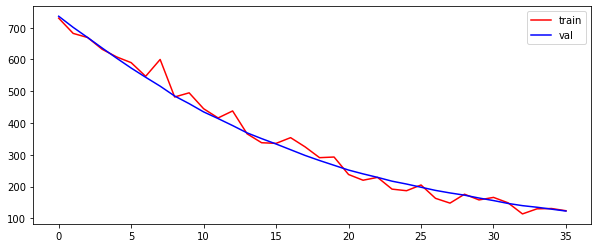

----------
minibatch:0/12
epoch:4--estimated_error:[125.769882]--val_eror:[118.26629761]
minibatch:1/12
epoch:4--estimated_error:[118.53990207]--val_eror:[112.99266036]
minibatch:2/12
epoch:4--estimated_error:[131.37254267]--val_eror:[108.46555151]
minibatch:3/12
epoch:4--estimated_error:[106.9730329]--val_eror:[103.63287813]
minibatch:4/12
epoch:4--estimated_error:[140.61004793]--val_eror:[99.65671433]
minibatch:5/12
epoch:4--estimated_error:[113.59064686]--val_eror:[94.73532181]
minibatch:6/12
epoch:4--estimated_error:[89.28811699]--val_eror:[91.3871841]
minibatch:7/12
epoch:4--estimated_error:[99.69494169]--val_eror:[89.09109068]
minibatch:8/12
epoch:4--estimated_error:[90.54315869]--val_eror:[86.64432897]
minibatch:9/12
epoch:4--estimated_error:[90.36705112]--val_eror:[84.70850485]
minibatch:10/12
epoch:4--estimated_error:[93.01963786]--val_eror:[83.25255332]
minibatch:11/12
epoch:4--estimated_error:[89.3741538]--val_eror:[81.83804849]


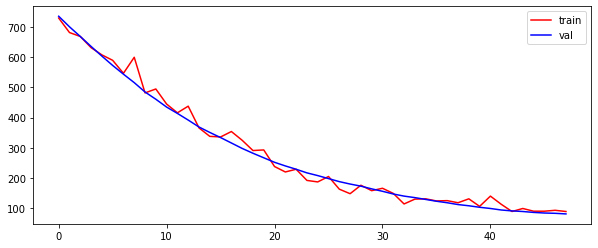

----------
minibatch:0/12
epoch:5--estimated_error:[127.53540062]--val_eror:[80.65350419]
minibatch:1/12
epoch:5--estimated_error:[70.20744955]--val_eror:[79.10565108]
minibatch:2/12
epoch:5--estimated_error:[76.15418259]--val_eror:[78.43804588]
minibatch:3/12
epoch:5--estimated_error:[74.37045123]--val_eror:[77.88159368]
minibatch:4/12
epoch:5--estimated_error:[84.6611927]--val_eror:[77.49311066]
minibatch:5/12
epoch:5--estimated_error:[73.63118842]--val_eror:[77.01791868]
minibatch:6/12
epoch:5--estimated_error:[60.25686197]--val_eror:[76.63126428]
minibatch:7/12
epoch:5--estimated_error:[43.24429848]--val_eror:[76.3102137]
minibatch:8/12
epoch:5--estimated_error:[70.96822154]--val_eror:[76.24610869]
minibatch:9/12
epoch:5--estimated_error:[72.60529449]--val_eror:[75.98032844]
minibatch:10/12
epoch:5--estimated_error:[86.63483796]--val_eror:[75.56959182]
minibatch:11/12
epoch:5--estimated_error:[70.92103054]--val_eror:[75.18737377]


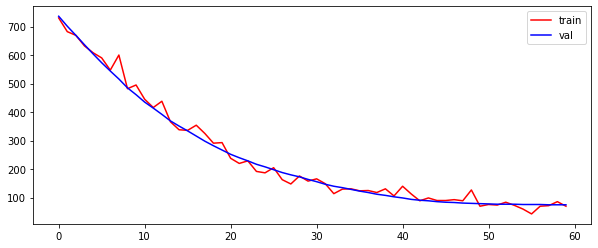

----------
minibatch:0/12
epoch:6--estimated_error:[69.16700911]--val_eror:[74.92244079]
minibatch:1/12
epoch:6--estimated_error:[85.32892845]--val_eror:[74.6282681]
minibatch:2/12
epoch:6--estimated_error:[65.81006182]--val_eror:[74.24319689]
minibatch:3/12
epoch:6--estimated_error:[58.62340101]--val_eror:[74.0121306]
minibatch:4/12
epoch:6--estimated_error:[84.00815035]--val_eror:[73.86921879]
minibatch:5/12
epoch:6--estimated_error:[52.18606113]--val_eror:[73.52808846]
minibatch:6/12
epoch:6--estimated_error:[85.78763608]--val_eror:[73.36267824]
minibatch:7/12
epoch:6--estimated_error:[69.29010114]--val_eror:[72.97469506]
minibatch:8/12
epoch:6--estimated_error:[63.74327509]--val_eror:[72.69285398]
minibatch:9/12
epoch:6--estimated_error:[82.50378212]--val_eror:[72.48517486]
minibatch:10/12
epoch:6--estimated_error:[63.1152151]--val_eror:[72.16736879]
minibatch:11/12
epoch:6--estimated_error:[76.0716685]--val_eror:[71.97552625]


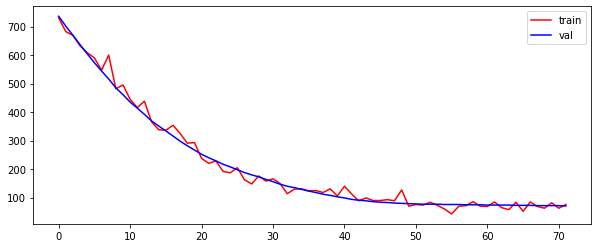

----------
minibatch:0/12
epoch:7--estimated_error:[86.25271924]--val_eror:[71.73378422]
minibatch:1/12
epoch:7--estimated_error:[62.40135902]--val_eror:[71.35037736]
minibatch:2/12
epoch:7--estimated_error:[57.64966629]--val_eror:[71.13220783]
minibatch:3/12
epoch:7--estimated_error:[57.15847935]--val_eror:[70.97060832]
minibatch:4/12
epoch:7--estimated_error:[65.70632199]--val_eror:[70.85333929]
minibatch:5/12
epoch:7--estimated_error:[75.86425685]--val_eror:[70.64213541]
minibatch:6/12
epoch:7--estimated_error:[73.77168079]--val_eror:[70.43810427]
minibatch:7/12
epoch:7--estimated_error:[86.0309514]--val_eror:[70.19623901]
minibatch:8/12
epoch:7--estimated_error:[66.89964643]--val_eror:[69.97063067]
minibatch:9/12
epoch:7--estimated_error:[62.59504588]--val_eror:[69.78534209]
minibatch:10/12
epoch:7--estimated_error:[58.51110204]--val_eror:[69.62516077]
minibatch:11/12
epoch:7--estimated_error:[61.78804437]--val_eror:[69.48088443]


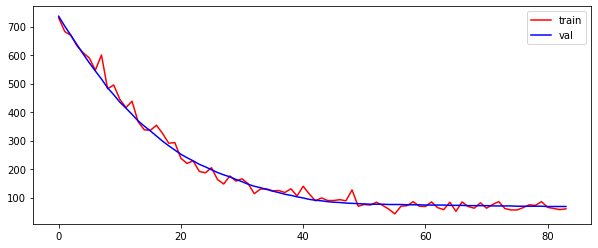

----------
minibatch:0/12
epoch:8--estimated_error:[74.82723148]--val_eror:[69.31355468]
minibatch:1/12
epoch:8--estimated_error:[53.49317356]--val_eror:[69.11310501]
minibatch:2/12
epoch:8--estimated_error:[77.66974443]--val_eror:[68.99296559]
minibatch:3/12
epoch:8--estimated_error:[84.64570379]--val_eror:[68.72471435]
minibatch:4/12
epoch:8--estimated_error:[76.21074538]--val_eror:[68.45508773]
minibatch:5/12
epoch:8--estimated_error:[80.0237054]--val_eror:[68.26845104]
minibatch:6/12
epoch:8--estimated_error:[78.98993413]--val_eror:[68.03630579]
minibatch:7/12
epoch:8--estimated_error:[58.37363881]--val_eror:[67.73076704]
minibatch:8/12
epoch:8--estimated_error:[71.02351873]--val_eror:[67.61321328]
minibatch:9/12
epoch:8--estimated_error:[57.11508927]--val_eror:[67.33974994]
minibatch:10/12
epoch:8--estimated_error:[60.16081335]--val_eror:[67.24075638]
minibatch:11/12
epoch:8--estimated_error:[52.4626607]--val_eror:[67.0967341]


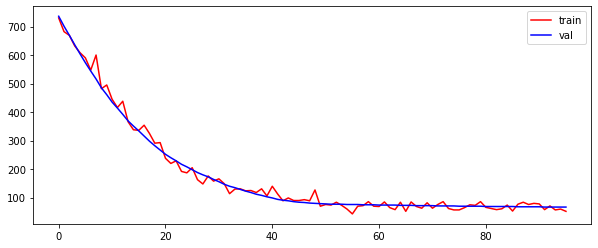

----------
minibatch:0/12
epoch:9--estimated_error:[65.77215949]--val_eror:[66.92901019]
minibatch:1/12
epoch:9--estimated_error:[72.5896584]--val_eror:[66.72029621]
minibatch:2/12
epoch:9--estimated_error:[66.39519675]--val_eror:[66.49038776]
minibatch:3/12
epoch:9--estimated_error:[41.22158837]--val_eror:[66.32819254]
minibatch:4/12
epoch:9--estimated_error:[72.45710753]--val_eror:[66.21284602]
minibatch:5/12
epoch:9--estimated_error:[62.25263903]--val_eror:[66.01014305]
minibatch:6/12
epoch:9--estimated_error:[52.82538004]--val_eror:[65.82321285]
minibatch:7/12
epoch:9--estimated_error:[52.86501467]--val_eror:[65.72088494]
minibatch:8/12
epoch:9--estimated_error:[55.85786656]--val_eror:[65.60701653]
minibatch:9/12
epoch:9--estimated_error:[61.21313658]--val_eror:[65.42458186]
minibatch:10/12
epoch:9--estimated_error:[59.59712365]--val_eror:[65.255817]
minibatch:11/12
epoch:9--estimated_error:[64.90714029]--val_eror:[65.06831391]


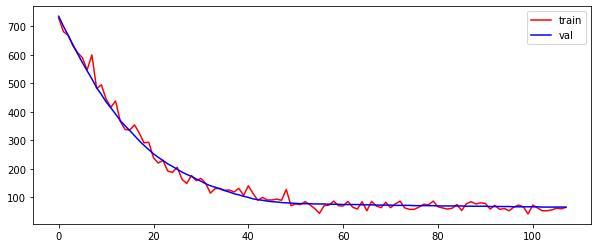

----------
minibatch:0/12
epoch:10--estimated_error:[88.82545492]--val_eror:[64.86564234]
minibatch:1/12
epoch:10--estimated_error:[63.62202134]--val_eror:[64.61209388]
minibatch:2/12
epoch:10--estimated_error:[63.73513871]--val_eror:[64.4093841]
minibatch:3/12
epoch:10--estimated_error:[60.95609194]--val_eror:[64.36573791]
minibatch:4/12
epoch:10--estimated_error:[60.37309431]--val_eror:[64.15974128]
minibatch:5/12
epoch:10--estimated_error:[54.11723534]--val_eror:[63.94717682]
minibatch:6/12
epoch:10--estimated_error:[59.1690795]--val_eror:[63.72496477]
minibatch:7/12
epoch:10--estimated_error:[69.17041996]--val_eror:[63.50968281]
minibatch:8/12
epoch:10--estimated_error:[73.67133288]--val_eror:[63.36530028]
minibatch:9/12
epoch:10--estimated_error:[70.17506211]--val_eror:[63.19027157]
minibatch:10/12
epoch:10--estimated_error:[57.49163863]--val_eror:[62.97861633]
minibatch:11/12
epoch:10--estimated_error:[66.35459846]--val_eror:[62.77384412]


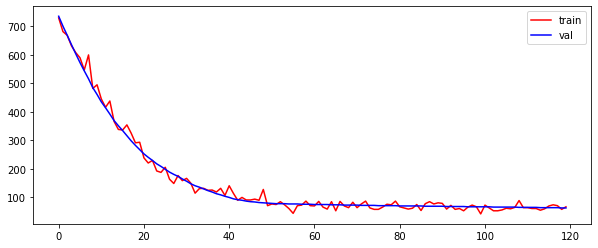

----------
minibatch:0/12
epoch:11--estimated_error:[73.23574171]--val_eror:[62.62506884]
minibatch:1/12
epoch:11--estimated_error:[68.21504329]--val_eror:[62.3656481]
minibatch:2/12
epoch:11--estimated_error:[58.87827815]--val_eror:[62.15632943]
minibatch:3/12
epoch:11--estimated_error:[60.0644934]--val_eror:[62.00174176]
minibatch:4/12
epoch:11--estimated_error:[61.23719762]--val_eror:[61.79754732]
minibatch:5/12
epoch:11--estimated_error:[78.34632986]--val_eror:[61.67153446]
minibatch:6/12
epoch:11--estimated_error:[53.18189654]--val_eror:[61.37287691]
minibatch:7/12
epoch:11--estimated_error:[65.55832202]--val_eror:[61.12833222]
minibatch:8/12
epoch:11--estimated_error:[70.60407552]--val_eror:[60.97556633]
minibatch:9/12
epoch:11--estimated_error:[48.93746265]--val_eror:[60.65013461]
minibatch:10/12
epoch:11--estimated_error:[61.57635651]--val_eror:[60.4767301]
minibatch:11/12
epoch:11--estimated_error:[81.47199681]--val_eror:[60.28985781]


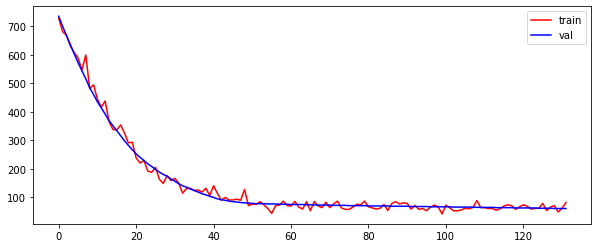

----------
minibatch:0/12
epoch:12--estimated_error:[58.56039273]--val_eror:[60.11243617]
minibatch:1/12
epoch:12--estimated_error:[50.40712549]--val_eror:[59.86248678]
minibatch:2/12
epoch:12--estimated_error:[57.27158315]--val_eror:[59.66492425]
minibatch:3/12
epoch:12--estimated_error:[66.91788825]--val_eror:[59.49855708]
minibatch:4/12
epoch:12--estimated_error:[51.66127956]--val_eror:[59.2191905]
minibatch:5/12
epoch:12--estimated_error:[55.56548597]--val_eror:[58.99275826]
minibatch:6/12
epoch:12--estimated_error:[54.359191]--val_eror:[58.8200277]
minibatch:7/12
epoch:12--estimated_error:[58.53588907]--val_eror:[58.64760834]
minibatch:8/12
epoch:12--estimated_error:[55.91927987]--val_eror:[58.41581619]
minibatch:9/12
epoch:12--estimated_error:[54.35459401]--val_eror:[58.26899644]
minibatch:10/12
epoch:12--estimated_error:[45.60882008]--val_eror:[58.12095739]
minibatch:11/12
epoch:12--estimated_error:[41.95981199]--val_eror:[58.02633012]


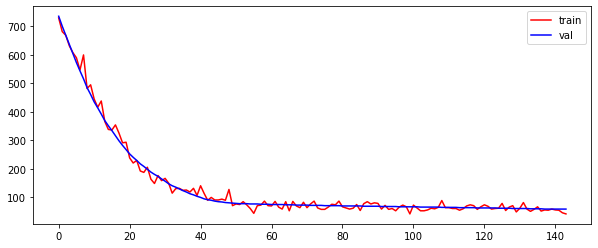

----------
minibatch:0/12
epoch:13--estimated_error:[73.72703372]--val_eror:[57.91968771]
minibatch:1/12
epoch:13--estimated_error:[53.1043339]--val_eror:[57.67780729]
minibatch:2/12
epoch:13--estimated_error:[69.67317434]--val_eror:[57.45264561]
minibatch:3/12
epoch:13--estimated_error:[56.02115912]--val_eror:[57.19791031]
minibatch:4/12
epoch:13--estimated_error:[57.55532029]--val_eror:[56.99733649]
minibatch:5/12
epoch:13--estimated_error:[63.3691568]--val_eror:[56.80183388]
minibatch:6/12
epoch:13--estimated_error:[63.3900315]--val_eror:[56.58805117]
minibatch:7/12
epoch:13--estimated_error:[67.69254465]--val_eror:[56.36991907]
minibatch:8/12
epoch:13--estimated_error:[45.85169672]--val_eror:[56.17204918]
minibatch:9/12
epoch:13--estimated_error:[36.40012261]--val_eror:[56.02942337]
minibatch:10/12
epoch:13--estimated_error:[52.95694034]--val_eror:[55.93477296]
minibatch:11/12
epoch:13--estimated_error:[64.7511654]--val_eror:[55.75197703]


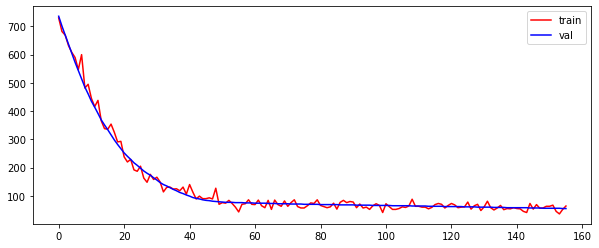

----------
minibatch:0/12
epoch:14--estimated_error:[62.25507679]--val_eror:[55.51683132]
minibatch:1/12
epoch:14--estimated_error:[53.73756218]--val_eror:[55.32386724]
minibatch:2/12
epoch:14--estimated_error:[46.7453211]--val_eror:[55.15319402]
minibatch:3/12
epoch:14--estimated_error:[39.1621072]--val_eror:[55.00700715]
minibatch:4/12
epoch:14--estimated_error:[52.19461287]--val_eror:[54.8731874]
minibatch:5/12
epoch:14--estimated_error:[39.55820441]--val_eror:[54.72215773]
minibatch:6/12
epoch:14--estimated_error:[71.33195805]--val_eror:[54.61968467]
minibatch:7/12
epoch:14--estimated_error:[56.61981545]--val_eror:[54.35472412]
minibatch:8/12
epoch:14--estimated_error:[35.08375909]--val_eror:[54.22133724]
minibatch:9/12
epoch:14--estimated_error:[66.4981894]--val_eror:[54.12456551]
minibatch:10/12
epoch:14--estimated_error:[52.81776941]--val_eror:[53.90650264]
minibatch:11/12
epoch:14--estimated_error:[53.3562133]--val_eror:[53.75722027]


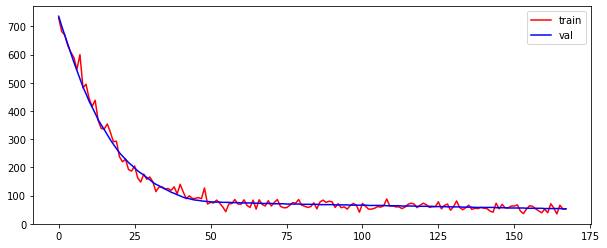

----------
minibatch:0/12
epoch:15--estimated_error:[53.11818842]--val_eror:[53.56584189]
minibatch:1/12
epoch:15--estimated_error:[45.95797552]--val_eror:[53.37932501]
minibatch:2/12
epoch:15--estimated_error:[64.89649569]--val_eror:[53.22457351]
minibatch:3/12
epoch:15--estimated_error:[42.22363135]--val_eror:[52.98591977]
minibatch:4/12
epoch:15--estimated_error:[50.49467746]--val_eror:[52.85717524]
minibatch:5/12
epoch:15--estimated_error:[53.25683163]--val_eror:[52.71161666]
minibatch:6/12
epoch:15--estimated_error:[51.85369184]--val_eror:[52.58221485]
minibatch:7/12
epoch:15--estimated_error:[41.91751484]--val_eror:[52.46033174]
minibatch:8/12
epoch:15--estimated_error:[50.17731354]--val_eror:[52.32415473]
minibatch:9/12
epoch:15--estimated_error:[48.53858014]--val_eror:[52.19152863]
minibatch:10/12
epoch:15--estimated_error:[53.96923039]--val_eror:[52.0441673]
minibatch:11/12
epoch:15--estimated_error:[49.20148814]--val_eror:[51.85942716]


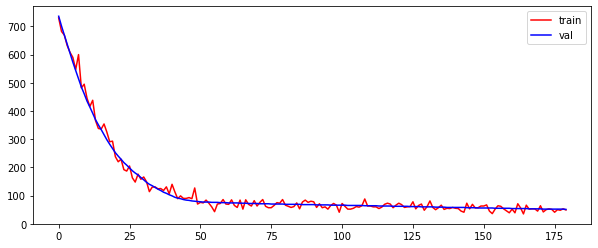

----------
minibatch:0/12
epoch:16--estimated_error:[36.64342408]--val_eror:[51.71595281]
minibatch:1/12
epoch:16--estimated_error:[48.21576367]--val_eror:[51.58916606]
minibatch:2/12
epoch:16--estimated_error:[44.4109949]--val_eror:[51.46606638]
minibatch:3/12
epoch:16--estimated_error:[56.03817655]--val_eror:[51.34656976]
minibatch:4/12
epoch:16--estimated_error:[48.03310288]--val_eror:[51.17797287]
minibatch:5/12
epoch:16--estimated_error:[45.58206409]--val_eror:[51.05160919]
minibatch:6/12
epoch:16--estimated_error:[49.6290774]--val_eror:[50.93952843]
minibatch:7/12
epoch:16--estimated_error:[41.68571083]--val_eror:[50.80033019]
minibatch:8/12
epoch:16--estimated_error:[47.64043656]--val_eror:[50.69287568]
minibatch:9/12
epoch:16--estimated_error:[63.55011685]--val_eror:[50.54184779]
minibatch:10/12
epoch:16--estimated_error:[54.01616734]--val_eror:[50.33813404]
minibatch:11/12
epoch:16--estimated_error:[32.43526695]--val_eror:[50.15456988]


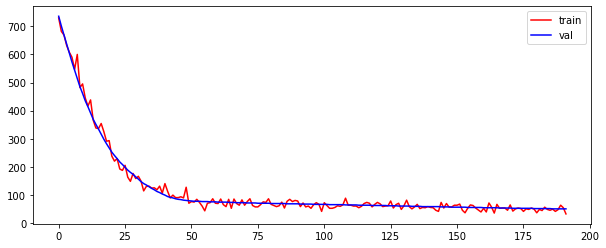

----------
minibatch:0/12
epoch:17--estimated_error:[46.51856635]--val_eror:[50.08402798]
minibatch:1/12
epoch:17--estimated_error:[34.05717881]--val_eror:[49.96832689]
minibatch:2/12
epoch:17--estimated_error:[50.1254108]--val_eror:[49.90054319]
minibatch:3/12
epoch:17--estimated_error:[51.07995293]--val_eror:[49.73335377]
minibatch:4/12
epoch:17--estimated_error:[46.48829235]--val_eror:[49.58496622]
minibatch:5/12
epoch:17--estimated_error:[36.95282369]--val_eror:[49.46171847]
minibatch:6/12
epoch:17--estimated_error:[43.29343096]--val_eror:[49.37495487]
minibatch:7/12
epoch:17--estimated_error:[52.47588579]--val_eror:[49.24808344]
minibatch:8/12
epoch:17--estimated_error:[44.39057606]--val_eror:[49.06756234]
minibatch:9/12
epoch:17--estimated_error:[39.46008978]--val_eror:[48.94933195]
minibatch:10/12
epoch:17--estimated_error:[54.7865476]--val_eror:[48.83457078]
minibatch:11/12
epoch:17--estimated_error:[45.97373603]--val_eror:[48.66116982]


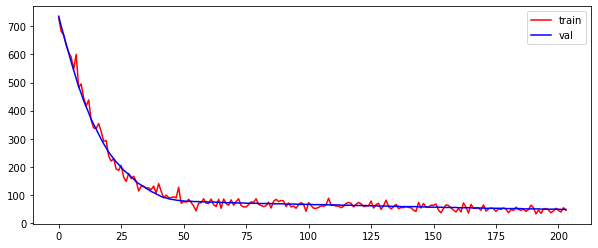

----------
minibatch:0/12
epoch:18--estimated_error:[33.0868731]--val_eror:[48.53445537]
minibatch:1/12
epoch:18--estimated_error:[45.99253245]--val_eror:[48.47737748]
minibatch:2/12
epoch:18--estimated_error:[35.06051047]--val_eror:[48.37371144]
minibatch:3/12
epoch:18--estimated_error:[45.08613204]--val_eror:[48.28208184]
minibatch:4/12
epoch:18--estimated_error:[39.58310861]--val_eror:[48.17256843]
minibatch:5/12
epoch:18--estimated_error:[47.28942443]--val_eror:[48.063327]
minibatch:6/12
epoch:18--estimated_error:[37.31701895]--val_eror:[47.91994619]
minibatch:7/12
epoch:18--estimated_error:[48.8841841]--val_eror:[47.83982194]
minibatch:8/12
epoch:18--estimated_error:[43.52464967]--val_eror:[47.69344475]
minibatch:9/12
epoch:18--estimated_error:[42.67898913]--val_eror:[47.55616625]
minibatch:10/12
epoch:18--estimated_error:[49.39644696]--val_eror:[47.4343761]
minibatch:11/12
epoch:18--estimated_error:[45.41236369]--val_eror:[47.2688199]


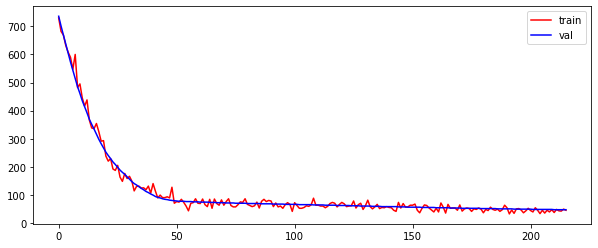

----------
minibatch:0/12
epoch:19--estimated_error:[30.83757158]--val_eror:[47.13534806]
minibatch:1/12
epoch:19--estimated_error:[43.03387648]--val_eror:[47.04038479]
minibatch:2/12
epoch:19--estimated_error:[32.83505448]--val_eror:[46.96835675]
minibatch:3/12
epoch:19--estimated_error:[48.84933291]--val_eror:[46.88038322]
minibatch:4/12
epoch:19--estimated_error:[47.33066182]--val_eror:[46.74148914]
minibatch:5/12
epoch:19--estimated_error:[46.44899028]--val_eror:[46.61228974]
minibatch:6/12
epoch:19--estimated_error:[40.35761877]--val_eror:[46.46511811]
minibatch:7/12
epoch:19--estimated_error:[49.00713755]--val_eror:[46.36344142]
minibatch:8/12
epoch:19--estimated_error:[52.73305751]--val_eror:[46.22788821]
minibatch:9/12
epoch:19--estimated_error:[49.73558471]--val_eror:[46.09762165]
minibatch:10/12
epoch:19--estimated_error:[45.76445986]--val_eror:[45.93138705]
minibatch:11/12
epoch:19--estimated_error:[41.54200455]--val_eror:[45.79504691]


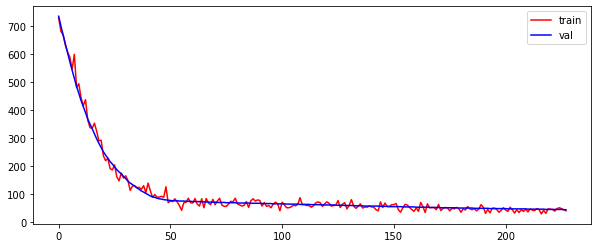

----------
minibatch:0/12
epoch:20--estimated_error:[44.87986033]--val_eror:[45.6857746]
minibatch:1/12
epoch:20--estimated_error:[40.14343159]--val_eror:[45.54666122]
minibatch:2/12
epoch:20--estimated_error:[39.04093964]--val_eror:[45.41635312]
minibatch:3/12
epoch:20--estimated_error:[48.93809703]--val_eror:[45.30472587]
minibatch:4/12
epoch:20--estimated_error:[45.84739282]--val_eror:[45.15823359]
minibatch:5/12
epoch:20--estimated_error:[40.57413505]--val_eror:[45.02201107]
minibatch:6/12
epoch:20--estimated_error:[46.78279606]--val_eror:[44.91403294]
minibatch:7/12
epoch:20--estimated_error:[35.83624044]--val_eror:[44.76248097]
minibatch:8/12
epoch:20--estimated_error:[38.2112166]--val_eror:[44.64650513]
minibatch:9/12
epoch:20--estimated_error:[39.95426371]--val_eror:[44.52661651]
minibatch:10/12
epoch:20--estimated_error:[38.7367374]--val_eror:[44.4128884]
minibatch:11/12
epoch:20--estimated_error:[46.01559442]--val_eror:[44.28247838]


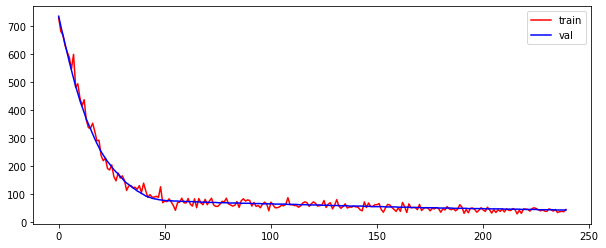

----------
minibatch:0/12
epoch:21--estimated_error:[42.68642398]--val_eror:[44.14897883]
minibatch:1/12
epoch:21--estimated_error:[51.04060671]--val_eror:[44.0205926]
minibatch:2/12
epoch:21--estimated_error:[40.76710577]--val_eror:[43.84794907]
minibatch:3/12
epoch:21--estimated_error:[44.5544611]--val_eror:[43.7406092]
minibatch:4/12
epoch:21--estimated_error:[34.58694623]--val_eror:[43.63082892]
minibatch:5/12
epoch:21--estimated_error:[35.32054341]--val_eror:[43.5586038]
minibatch:6/12
epoch:21--estimated_error:[45.86558437]--val_eror:[43.5137048]
minibatch:7/12
epoch:21--estimated_error:[39.01425739]--val_eror:[43.38354613]
minibatch:8/12
epoch:21--estimated_error:[39.73064171]--val_eror:[43.26364567]
minibatch:9/12
epoch:21--estimated_error:[40.27851818]--val_eror:[43.15455209]
minibatch:10/12
epoch:21--estimated_error:[39.67353551]--val_eror:[43.09315039]
minibatch:11/12
epoch:21--estimated_error:[37.84005208]--val_eror:[42.98225355]


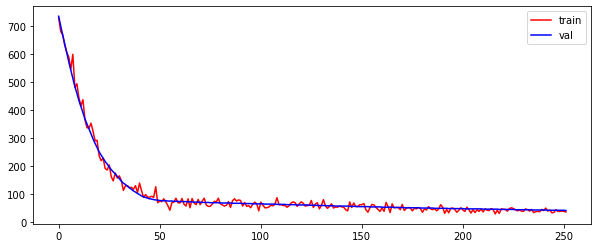

----------
minibatch:0/12
epoch:22--estimated_error:[46.51922812]--val_eror:[42.86616057]
minibatch:1/12
epoch:22--estimated_error:[40.81910973]--val_eror:[42.73519125]
minibatch:2/12
epoch:22--estimated_error:[44.77416822]--val_eror:[42.62960315]
minibatch:3/12
epoch:22--estimated_error:[43.6508502]--val_eror:[42.50242681]
minibatch:4/12
epoch:22--estimated_error:[39.96972791]--val_eror:[42.39865058]
minibatch:5/12
epoch:22--estimated_error:[48.07369654]--val_eror:[42.29525713]
minibatch:6/12
epoch:22--estimated_error:[37.30048154]--val_eror:[42.14395125]
minibatch:7/12
epoch:22--estimated_error:[45.23494995]--val_eror:[42.02735486]
minibatch:8/12
epoch:22--estimated_error:[28.41095092]--val_eror:[41.9216711]
minibatch:9/12
epoch:22--estimated_error:[33.03204689]--val_eror:[41.86345064]
minibatch:10/12
epoch:22--estimated_error:[47.12750752]--val_eror:[41.78584912]
minibatch:11/12
epoch:22--estimated_error:[25.48139798]--val_eror:[41.68542035]


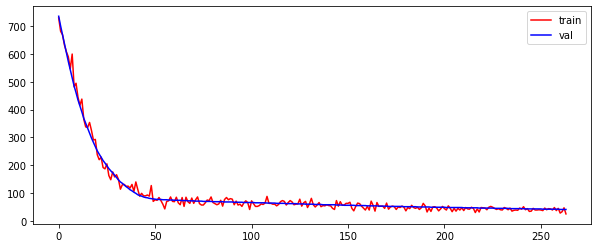

----------
minibatch:0/12
epoch:23--estimated_error:[38.5365626]--val_eror:[41.60275798]
minibatch:1/12
epoch:23--estimated_error:[43.03081544]--val_eror:[41.53926761]
minibatch:2/12
epoch:23--estimated_error:[34.52514016]--val_eror:[41.47826273]
minibatch:3/12
epoch:23--estimated_error:[37.2363772]--val_eror:[41.36784321]
minibatch:4/12
epoch:23--estimated_error:[18.17404037]--val_eror:[41.21539206]
minibatch:5/12
epoch:23--estimated_error:[34.14695818]--val_eror:[41.19090125]
minibatch:6/12
epoch:23--estimated_error:[33.02126189]--val_eror:[41.09273454]
minibatch:7/12
epoch:23--estimated_error:[30.65202398]--val_eror:[41.03511707]
minibatch:8/12
epoch:23--estimated_error:[43.28435134]--val_eror:[40.95519376]
minibatch:9/12
epoch:23--estimated_error:[35.14962539]--val_eror:[40.86381567]
minibatch:10/12
epoch:23--estimated_error:[36.12572407]--val_eror:[40.80822787]
minibatch:11/12
epoch:23--estimated_error:[32.46245505]--val_eror:[40.69713888]


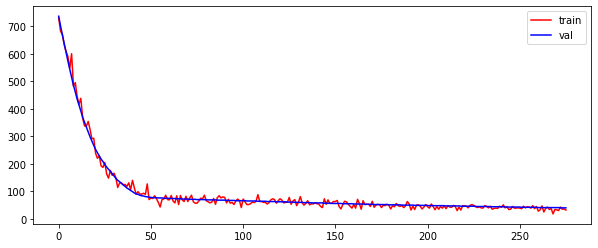

----------
minibatch:0/12
epoch:24--estimated_error:[40.01223515]--val_eror:[40.63513067]
minibatch:1/12
epoch:24--estimated_error:[37.62770512]--val_eror:[40.51720176]
minibatch:2/12
epoch:24--estimated_error:[37.65544132]--val_eror:[40.44972644]
minibatch:3/12
epoch:24--estimated_error:[30.39066882]--val_eror:[40.38455859]
minibatch:4/12
epoch:24--estimated_error:[50.06530323]--val_eror:[40.30395593]
minibatch:5/12
epoch:24--estimated_error:[46.57130219]--val_eror:[40.21838097]
minibatch:6/12
epoch:24--estimated_error:[35.71728841]--val_eror:[40.12265527]
minibatch:7/12
epoch:24--estimated_error:[39.02511524]--val_eror:[40.04613936]
minibatch:8/12
epoch:24--estimated_error:[37.24662606]--val_eror:[39.95053795]
minibatch:9/12
epoch:24--estimated_error:[30.45925333]--val_eror:[39.82553052]
minibatch:10/12
epoch:24--estimated_error:[38.23166433]--val_eror:[39.81519777]
minibatch:11/12
epoch:24--estimated_error:[31.38597137]--val_eror:[39.69992168]


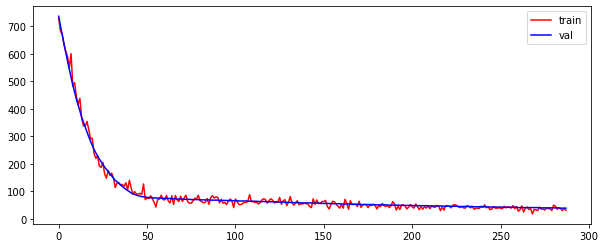

----------
minibatch:0/12
epoch:25--estimated_error:[38.31090803]--val_eror:[39.5957085]
minibatch:1/12
epoch:25--estimated_error:[43.89161293]--val_eror:[39.47758904]
minibatch:2/12
epoch:25--estimated_error:[27.78810593]--val_eror:[39.35730148]
minibatch:3/12
epoch:25--estimated_error:[30.66256985]--val_eror:[39.3079158]
minibatch:4/12
epoch:25--estimated_error:[35.59698746]--val_eror:[39.18887753]
minibatch:5/12
epoch:25--estimated_error:[34.29842822]--val_eror:[39.07417034]
minibatch:6/12
epoch:25--estimated_error:[37.16745784]--val_eror:[39.00679736]
minibatch:7/12
epoch:25--estimated_error:[32.62353485]--val_eror:[38.91126484]
minibatch:8/12
epoch:25--estimated_error:[39.59329451]--val_eror:[38.83749201]
minibatch:9/12
epoch:25--estimated_error:[35.0316313]--val_eror:[38.74351218]
minibatch:10/12
epoch:25--estimated_error:[29.99915747]--val_eror:[38.66294584]
minibatch:11/12
epoch:25--estimated_error:[35.05697415]--val_eror:[38.58834004]


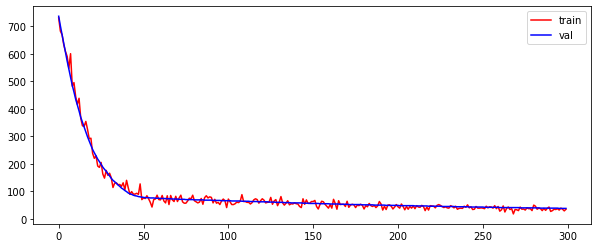

----------
minibatch:0/12
epoch:26--estimated_error:[35.23442892]--val_eror:[38.4962041]
minibatch:1/12
epoch:26--estimated_error:[38.98649265]--val_eror:[38.42546317]
minibatch:2/12
epoch:26--estimated_error:[29.58440651]--val_eror:[38.31975247]
minibatch:3/12
epoch:26--estimated_error:[43.92660696]--val_eror:[38.25977479]
minibatch:4/12
epoch:26--estimated_error:[40.66378836]--val_eror:[38.14285542]
minibatch:5/12
epoch:26--estimated_error:[33.27578459]--val_eror:[38.06473384]
minibatch:6/12
epoch:26--estimated_error:[40.91395899]--val_eror:[37.98888487]
minibatch:7/12
epoch:26--estimated_error:[33.94722099]--val_eror:[37.89326066]
minibatch:8/12
epoch:26--estimated_error:[29.56256142]--val_eror:[37.80541792]
minibatch:9/12
epoch:26--estimated_error:[39.37929379]--val_eror:[37.7546549]
minibatch:10/12
epoch:26--estimated_error:[28.78755152]--val_eror:[37.66918917]
minibatch:11/12
epoch:26--estimated_error:[30.65569432]--val_eror:[37.62053442]


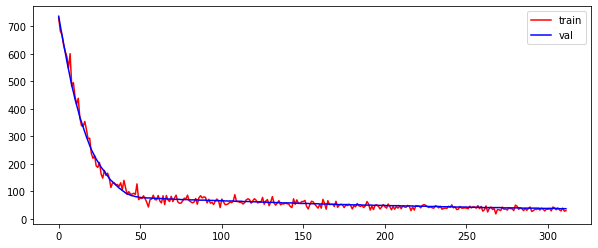

----------
minibatch:0/12
epoch:27--estimated_error:[47.71388849]--val_eror:[37.53104251]
minibatch:1/12
epoch:27--estimated_error:[41.56367207]--val_eror:[37.40489256]
minibatch:2/12
epoch:27--estimated_error:[36.35181967]--val_eror:[37.29357893]
minibatch:3/12
epoch:27--estimated_error:[27.30836394]--val_eror:[37.21911255]
minibatch:4/12
epoch:27--estimated_error:[28.34482698]--val_eror:[37.15497252]
minibatch:5/12
epoch:27--estimated_error:[28.29579705]--val_eror:[37.10064841]
minibatch:6/12
epoch:27--estimated_error:[39.23816773]--val_eror:[37.05125695]
minibatch:7/12
epoch:27--estimated_error:[34.97508548]--val_eror:[36.94420285]
minibatch:8/12
epoch:27--estimated_error:[36.7955591]--val_eror:[36.87996358]
minibatch:9/12
epoch:27--estimated_error:[39.85421856]--val_eror:[36.80006148]
minibatch:10/12
epoch:27--estimated_error:[33.19114696]--val_eror:[36.69338302]
minibatch:11/12
epoch:27--estimated_error:[37.30507306]--val_eror:[36.63978455]


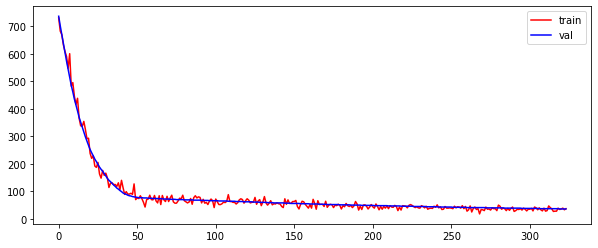

----------
minibatch:0/12
epoch:28--estimated_error:[32.48674161]--val_eror:[36.57355481]
minibatch:1/12
epoch:28--estimated_error:[36.28371152]--val_eror:[36.50290811]
minibatch:2/12
epoch:28--estimated_error:[36.40149777]--val_eror:[36.44699357]
minibatch:3/12
epoch:28--estimated_error:[35.18251355]--val_eror:[36.35932526]
minibatch:4/12
epoch:28--estimated_error:[38.21186501]--val_eror:[36.29648572]
minibatch:5/12
epoch:28--estimated_error:[36.54262532]--val_eror:[36.25103894]
minibatch:6/12
epoch:28--estimated_error:[37.68354106]--val_eror:[36.14671426]
minibatch:7/12
epoch:28--estimated_error:[27.4536085]--val_eror:[36.06253984]
minibatch:8/12
epoch:28--estimated_error:[32.18813209]--val_eror:[36.02052311]
minibatch:9/12
epoch:28--estimated_error:[31.93119078]--val_eror:[35.96485367]
minibatch:10/12
epoch:28--estimated_error:[31.98370343]--val_eror:[35.90975524]
minibatch:11/12
epoch:28--estimated_error:[27.65374105]--val_eror:[35.83267243]


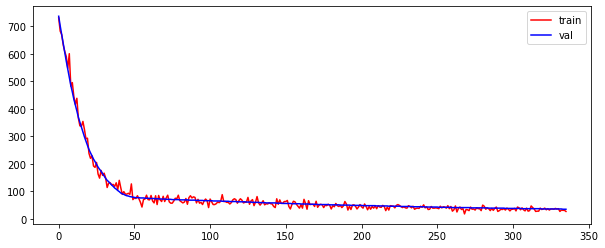

----------
minibatch:0/12
epoch:29--estimated_error:[24.3918605]--val_eror:[35.79394711]
minibatch:1/12
epoch:29--estimated_error:[33.09728593]--val_eror:[35.74805593]
minibatch:2/12
epoch:29--estimated_error:[38.04052612]--val_eror:[35.70595968]
minibatch:3/12
epoch:29--estimated_error:[34.72245495]--val_eror:[35.64505568]
minibatch:4/12
epoch:29--estimated_error:[32.64592248]--val_eror:[35.60416063]
minibatch:5/12
epoch:29--estimated_error:[39.24439183]--val_eror:[35.50762204]
minibatch:6/12
epoch:29--estimated_error:[34.09014625]--val_eror:[35.43588738]
minibatch:7/12
epoch:29--estimated_error:[31.43079428]--val_eror:[35.38296237]
minibatch:8/12
epoch:29--estimated_error:[30.31838913]--val_eror:[35.32511512]
minibatch:9/12
epoch:29--estimated_error:[33.13334001]--val_eror:[35.28831147]
minibatch:10/12
epoch:29--estimated_error:[38.88940213]--val_eror:[35.19232098]
minibatch:11/12
epoch:29--estimated_error:[42.02455729]--val_eror:[35.11066435]


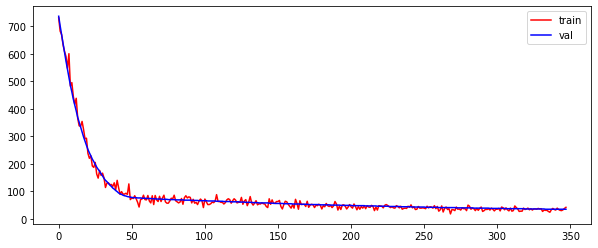

----------
minibatch:0/12
epoch:30--estimated_error:[37.15737066]--val_eror:[34.97661131]
minibatch:1/12
epoch:30--estimated_error:[27.36311614]--val_eror:[34.90514704]
minibatch:2/12
epoch:30--estimated_error:[27.17604766]--val_eror:[34.861559]
minibatch:3/12
epoch:30--estimated_error:[36.61187655]--val_eror:[34.83493259]
minibatch:4/12
epoch:30--estimated_error:[27.90951235]--val_eror:[34.75390422]
minibatch:5/12
epoch:30--estimated_error:[37.59317162]--val_eror:[34.68517545]
minibatch:6/12
epoch:30--estimated_error:[33.58261587]--val_eror:[34.58711887]
minibatch:7/12
epoch:30--estimated_error:[24.56586093]--val_eror:[34.51439492]
minibatch:8/12
epoch:30--estimated_error:[38.79513899]--val_eror:[34.45533217]
minibatch:9/12
epoch:30--estimated_error:[30.76222694]--val_eror:[34.35299991]
minibatch:10/12
epoch:30--estimated_error:[32.57773153]--val_eror:[34.28743449]
minibatch:11/12
epoch:30--estimated_error:[33.613478]--val_eror:[34.20062545]


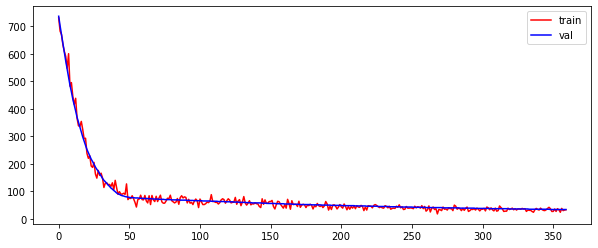

----------
minibatch:0/12
epoch:31--estimated_error:[36.28911844]--val_eror:[34.12782312]
minibatch:1/12
epoch:31--estimated_error:[28.00917765]--val_eror:[34.07447425]
minibatch:2/12
epoch:31--estimated_error:[27.54532464]--val_eror:[34.02724239]
minibatch:3/12
epoch:31--estimated_error:[42.28246398]--val_eror:[33.99784463]
minibatch:4/12
epoch:31--estimated_error:[29.24723469]--val_eror:[33.90675977]
minibatch:5/12
epoch:31--estimated_error:[29.53811655]--val_eror:[33.88135571]
minibatch:6/12
epoch:31--estimated_error:[32.44211738]--val_eror:[33.82840863]
minibatch:7/12
epoch:31--estimated_error:[27.97793056]--val_eror:[33.77621605]
minibatch:8/12
epoch:31--estimated_error:[39.49928797]--val_eror:[33.74046679]
minibatch:9/12
epoch:31--estimated_error:[32.5784991]--val_eror:[33.6408826]
minibatch:10/12
epoch:31--estimated_error:[35.82872035]--val_eror:[33.54924651]
minibatch:11/12
epoch:31--estimated_error:[33.94938272]--val_eror:[33.46539847]


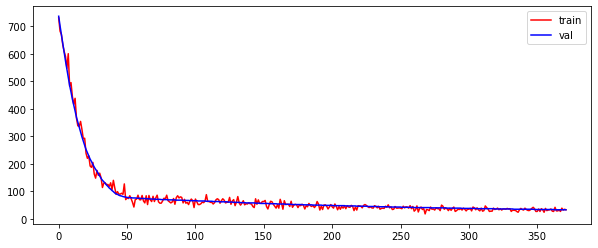

----------
minibatch:0/12
epoch:32--estimated_error:[26.02426678]--val_eror:[33.38004581]
minibatch:1/12
epoch:32--estimated_error:[35.19425164]--val_eror:[33.32902515]
minibatch:2/12
epoch:32--estimated_error:[32.22954988]--val_eror:[33.25407308]
minibatch:3/12
epoch:32--estimated_error:[32.04534148]--val_eror:[33.19838393]
minibatch:4/12
epoch:32--estimated_error:[29.62761592]--val_eror:[33.12678225]
minibatch:5/12
epoch:32--estimated_error:[34.14447612]--val_eror:[33.07819316]
minibatch:6/12
epoch:32--estimated_error:[21.05260303]--val_eror:[33.0014208]
minibatch:7/12
epoch:32--estimated_error:[37.07938185]--val_eror:[32.94489552]
minibatch:8/12
epoch:32--estimated_error:[30.58483613]--val_eror:[32.8603825]
minibatch:9/12
epoch:32--estimated_error:[29.7225239]--val_eror:[32.79171641]
minibatch:10/12
epoch:32--estimated_error:[29.67653143]--val_eror:[32.75032981]
minibatch:11/12
epoch:32--estimated_error:[40.54329133]--val_eror:[32.68654437]


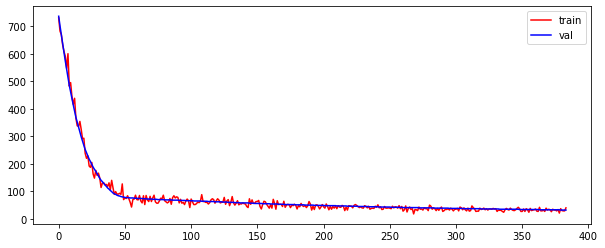

----------
minibatch:0/12
epoch:33--estimated_error:[33.54778667]--val_eror:[32.61912169]
minibatch:1/12
epoch:33--estimated_error:[30.09314448]--val_eror:[32.56535586]
minibatch:2/12
epoch:33--estimated_error:[34.23828401]--val_eror:[32.51933503]
minibatch:3/12
epoch:33--estimated_error:[27.91324877]--val_eror:[32.47149446]
minibatch:4/12
epoch:33--estimated_error:[31.42676488]--val_eror:[32.44358734]
minibatch:5/12
epoch:33--estimated_error:[28.12125694]--val_eror:[32.42378306]
minibatch:6/12
epoch:33--estimated_error:[30.90465284]--val_eror:[32.39284461]
minibatch:7/12
epoch:33--estimated_error:[36.44991507]--val_eror:[32.3258946]
minibatch:8/12
epoch:33--estimated_error:[28.06638428]--val_eror:[32.23957777]
minibatch:9/12
epoch:33--estimated_error:[34.33405932]--val_eror:[32.16188551]
minibatch:10/12
epoch:33--estimated_error:[39.36821028]--val_eror:[32.09325237]
minibatch:11/12
epoch:33--estimated_error:[29.68727838]--val_eror:[32.01082127]


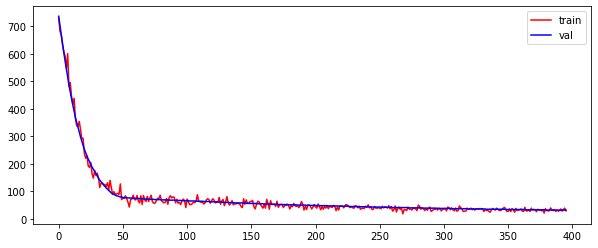

----------
minibatch:0/12
epoch:34--estimated_error:[29.4266728]--val_eror:[31.96196797]
minibatch:1/12
epoch:34--estimated_error:[30.33611928]--val_eror:[31.92437277]
minibatch:2/12
epoch:34--estimated_error:[25.49312673]--val_eror:[31.86484821]
minibatch:3/12
epoch:34--estimated_error:[26.73444555]--val_eror:[31.81432493]
minibatch:4/12
epoch:34--estimated_error:[31.57789501]--val_eror:[31.74317901]
minibatch:5/12
epoch:34--estimated_error:[32.37455063]--val_eror:[31.68581148]
minibatch:6/12
epoch:34--estimated_error:[37.03262287]--val_eror:[31.61651065]
minibatch:7/12
epoch:34--estimated_error:[31.26699651]--val_eror:[31.55828534]
minibatch:8/12
epoch:34--estimated_error:[36.75927444]--val_eror:[31.54980381]
minibatch:9/12
epoch:34--estimated_error:[30.99737281]--val_eror:[31.45297212]
minibatch:10/12
epoch:34--estimated_error:[32.33169368]--val_eror:[31.38175119]
minibatch:11/12
epoch:34--estimated_error:[31.66617496]--val_eror:[31.32583407]


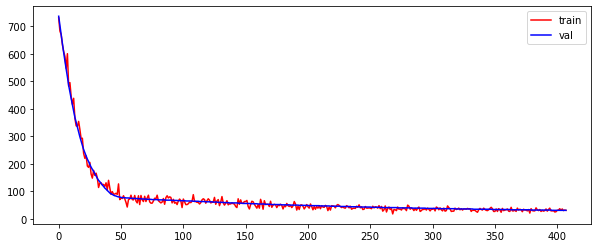

----------
minibatch:0/12
epoch:35--estimated_error:[28.56882986]--val_eror:[31.27785941]
minibatch:1/12
epoch:35--estimated_error:[22.71776118]--val_eror:[31.23450988]
minibatch:2/12
epoch:35--estimated_error:[31.50662925]--val_eror:[31.20169247]
minibatch:3/12
epoch:35--estimated_error:[29.25877576]--val_eror:[31.15745908]
minibatch:4/12
epoch:35--estimated_error:[37.06887894]--val_eror:[31.09317033]
minibatch:5/12
epoch:35--estimated_error:[22.2759695]--val_eror:[31.03182117]
minibatch:6/12
epoch:35--estimated_error:[28.34293631]--val_eror:[31.02467499]
minibatch:7/12
epoch:35--estimated_error:[34.45801427]--val_eror:[30.96606028]
minibatch:8/12
epoch:35--estimated_error:[28.06577134]--val_eror:[30.92071732]
minibatch:9/12
epoch:35--estimated_error:[24.67146325]--val_eror:[30.88433029]
minibatch:10/12
epoch:35--estimated_error:[30.71194073]--val_eror:[30.85404997]
minibatch:11/12
epoch:35--estimated_error:[20.24852444]--val_eror:[30.79844168]


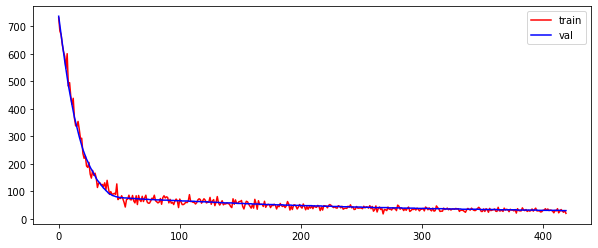

----------
minibatch:0/12
epoch:36--estimated_error:[25.50418832]--val_eror:[30.78323782]
minibatch:1/12
epoch:36--estimated_error:[23.26912476]--val_eror:[30.75516638]
minibatch:2/12
epoch:36--estimated_error:[31.41703303]--val_eror:[30.72498123]
minibatch:3/12
epoch:36--estimated_error:[26.22956919]--val_eror:[30.69979049]
minibatch:4/12
epoch:36--estimated_error:[31.87239843]--val_eror:[30.63443487]
minibatch:5/12
epoch:36--estimated_error:[28.69796287]--val_eror:[30.57571863]
minibatch:6/12
epoch:36--estimated_error:[18.53047101]--val_eror:[30.53531566]
minibatch:7/12
epoch:36--estimated_error:[26.13953745]--val_eror:[30.53560314]
minibatch:8/12
epoch:36--estimated_error:[18.53276972]--val_eror:[30.50380729]
minibatch:9/12
epoch:36--estimated_error:[27.67516409]--val_eror:[30.47514027]
minibatch:10/12
epoch:36--estimated_error:[31.50613577]--val_eror:[30.44925367]
minibatch:11/12
epoch:36--estimated_error:[27.94587636]--val_eror:[30.40283675]


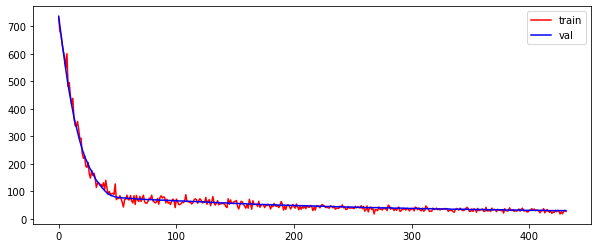

----------
minibatch:0/12
epoch:37--estimated_error:[28.25011923]--val_eror:[30.34775478]
minibatch:1/12
epoch:37--estimated_error:[28.59870268]--val_eror:[30.3001735]
minibatch:2/12
epoch:37--estimated_error:[30.24920459]--val_eror:[30.26588237]
minibatch:3/12
epoch:37--estimated_error:[21.31101825]--val_eror:[30.20252725]
minibatch:4/12
epoch:37--estimated_error:[29.33571709]--val_eror:[30.17456043]
minibatch:5/12
epoch:37--estimated_error:[22.96752663]--val_eror:[30.14043304]
minibatch:6/12
epoch:37--estimated_error:[23.2080931]--val_eror:[30.10456503]
minibatch:7/12
epoch:37--estimated_error:[37.4532049]--val_eror:[30.07017344]
minibatch:8/12
epoch:37--estimated_error:[25.21481485]--val_eror:[30.04740721]
minibatch:9/12
epoch:37--estimated_error:[30.77047042]--val_eror:[30.04252646]
minibatch:10/12
epoch:37--estimated_error:[28.61728376]--val_eror:[30.00501528]
minibatch:11/12
epoch:37--estimated_error:[23.65381083]--val_eror:[29.9546843]


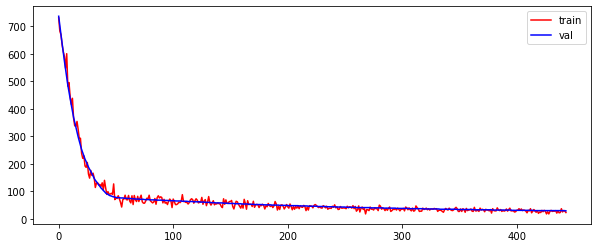

----------
minibatch:0/12
epoch:38--estimated_error:[28.11352121]--val_eror:[29.94011255]
minibatch:1/12
epoch:38--estimated_error:[27.13977439]--val_eror:[29.91160967]
minibatch:2/12
epoch:38--estimated_error:[26.59490934]--val_eror:[29.87921562]
minibatch:3/12
epoch:38--estimated_error:[24.75560294]--val_eror:[29.83611838]
minibatch:4/12
epoch:38--estimated_error:[21.02051708]--val_eror:[29.80133563]
minibatch:5/12
epoch:38--estimated_error:[25.13836022]--val_eror:[29.77457756]
minibatch:6/12
epoch:38--estimated_error:[19.31892679]--val_eror:[29.74483946]
minibatch:7/12
epoch:38--estimated_error:[33.91732428]--val_eror:[29.73492772]
minibatch:8/12
epoch:38--estimated_error:[31.728061]--val_eror:[29.70235708]
minibatch:9/12
epoch:38--estimated_error:[22.73590874]--val_eror:[29.70781147]
minibatch:10/12
epoch:38--estimated_error:[24.81181097]--val_eror:[29.66631429]
minibatch:11/12
epoch:38--estimated_error:[25.17167509]--val_eror:[29.64303625]


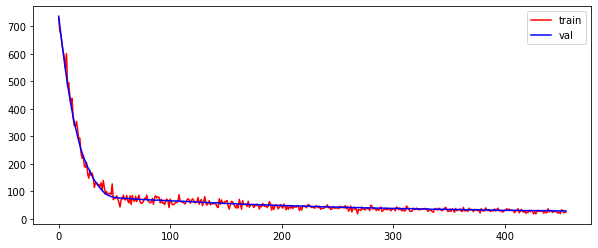

----------
minibatch:0/12
epoch:39--estimated_error:[22.51948207]--val_eror:[29.64297445]
minibatch:1/12
epoch:39--estimated_error:[34.4769863]--val_eror:[29.63337779]
minibatch:2/12
epoch:39--estimated_error:[33.72195376]--val_eror:[29.5992988]
minibatch:3/12
epoch:39--estimated_error:[27.9502742]--val_eror:[29.56231781]
minibatch:4/12
epoch:39--estimated_error:[23.24290503]--val_eror:[29.50485534]
minibatch:5/12
epoch:39--estimated_error:[15.18595423]--val_eror:[29.50684746]
minibatch:6/12
epoch:39--estimated_error:[25.28972046]--val_eror:[29.48790404]
minibatch:7/12
epoch:39--estimated_error:[33.5269465]--val_eror:[29.48819468]
minibatch:8/12
epoch:39--estimated_error:[29.87497389]--val_eror:[29.43032713]
minibatch:9/12
epoch:39--estimated_error:[25.69491081]--val_eror:[29.38295269]
minibatch:10/12
epoch:39--estimated_error:[25.35770994]--val_eror:[29.37867305]
minibatch:11/12
epoch:39--estimated_error:[24.00888522]--val_eror:[29.34935894]


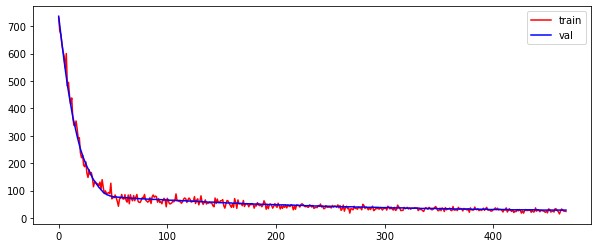

----------
minibatch:0/12
epoch:40--estimated_error:[31.04364791]--val_eror:[29.3135325]
minibatch:1/12
epoch:40--estimated_error:[23.80110794]--val_eror:[29.30613275]
minibatch:2/12
epoch:40--estimated_error:[28.32989573]--val_eror:[29.28796927]
minibatch:3/12
epoch:40--estimated_error:[28.87667466]--val_eror:[29.24399789]
minibatch:4/12
epoch:40--estimated_error:[36.86640567]--val_eror:[29.23315067]
minibatch:5/12
epoch:40--estimated_error:[25.48220494]--val_eror:[29.16192602]
minibatch:6/12
epoch:40--estimated_error:[26.58361305]--val_eror:[29.1719049]
minibatch:7/12
epoch:40--estimated_error:[27.21645293]--val_eror:[29.17569384]
minibatch:8/12
epoch:40--estimated_error:[28.26867803]--val_eror:[29.13250805]
minibatch:9/12
epoch:40--estimated_error:[21.27432525]--val_eror:[29.13579531]
minibatch:10/12
epoch:40--estimated_error:[32.11270611]--val_eror:[29.09350958]
minibatch:11/12
epoch:40--estimated_error:[25.47806465]--val_eror:[29.12820225]


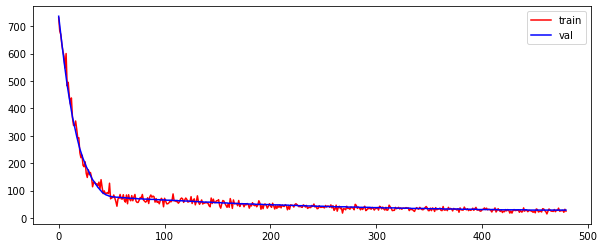

----------
minibatch:0/12
epoch:41--estimated_error:[21.50368859]--val_eror:[29.03282999]
minibatch:1/12
epoch:41--estimated_error:[29.17259968]--val_eror:[29.02089137]
minibatch:2/12
epoch:41--estimated_error:[26.67188735]--val_eror:[28.99232592]
minibatch:3/12
epoch:41--estimated_error:[27.69506785]--val_eror:[29.00166475]
minibatch:4/12
epoch:41--estimated_error:[24.24503341]--val_eror:[29.03640429]
minibatch:5/12
epoch:41--estimated_error:[23.01913307]--val_eror:[29.08341462]
minibatch:6/12
epoch:41--estimated_error:[29.09125774]--val_eror:[29.08077966]
minibatch:7/12
epoch:41--estimated_error:[15.35429152]--val_eror:[29.08210392]
minibatch:8/12
epoch:41--estimated_error:[20.65601413]--val_eror:[29.04606224]
minibatch:9/12
epoch:41--estimated_error:[27.87460883]--val_eror:[29.00668865]
minibatch:10/12
epoch:41--estimated_error:[28.01577289]--val_eror:[29.01353889]
minibatch:11/12
epoch:41--estimated_error:[26.20725536]--val_eror:[28.99973206]


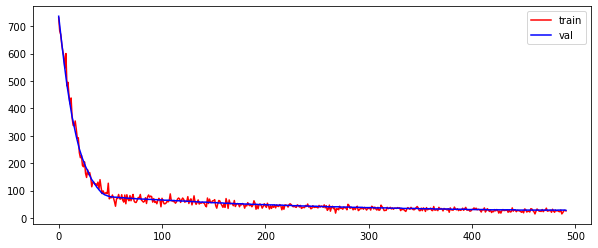

----------
minibatch:0/12
epoch:42--estimated_error:[26.12592317]--val_eror:[28.91387153]
minibatch:1/12
epoch:42--estimated_error:[23.46343122]--val_eror:[28.85150047]
minibatch:2/12
epoch:42--estimated_error:[29.13037871]--val_eror:[28.82143895]
minibatch:3/12
epoch:42--estimated_error:[28.43244682]--val_eror:[28.86260103]
minibatch:4/12
epoch:42--estimated_error:[23.11241752]--val_eror:[28.86720557]
minibatch:5/12
epoch:42--estimated_error:[23.78842276]--val_eror:[28.80447763]
minibatch:6/12
epoch:42--estimated_error:[24.17089113]--val_eror:[28.77456978]
minibatch:7/12
epoch:42--estimated_error:[27.87943797]--val_eror:[28.72555014]
minibatch:8/12
epoch:42--estimated_error:[25.52182918]--val_eror:[28.74674811]
minibatch:9/12
epoch:42--estimated_error:[30.38677294]--val_eror:[28.75255852]
minibatch:10/12
epoch:42--estimated_error:[31.41654086]--val_eror:[28.76282911]
minibatch:11/12
epoch:42--estimated_error:[26.21576719]--val_eror:[28.6890845]


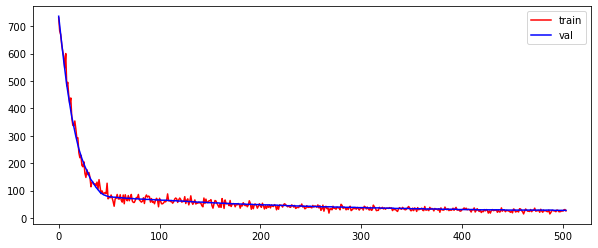

----------
minibatch:0/12
epoch:43--estimated_error:[31.78260091]--val_eror:[28.69262702]
minibatch:1/12
epoch:43--estimated_error:[24.21995732]--val_eror:[28.5746616]
minibatch:2/12
epoch:43--estimated_error:[26.60132814]--val_eror:[28.51381555]
minibatch:3/12
epoch:43--estimated_error:[20.42027879]--val_eror:[28.51749816]
minibatch:4/12
epoch:43--estimated_error:[26.26378707]--val_eror:[28.43408485]
minibatch:5/12
epoch:43--estimated_error:[23.82217881]--val_eror:[28.46721878]
minibatch:6/12
epoch:43--estimated_error:[23.10410405]--val_eror:[28.47415608]
minibatch:7/12
epoch:43--estimated_error:[28.28491465]--val_eror:[28.47573431]
minibatch:8/12
epoch:43--estimated_error:[19.76784144]--val_eror:[28.48524802]
minibatch:9/12
epoch:43--estimated_error:[19.07021622]--val_eror:[28.45796681]
minibatch:10/12
epoch:43--estimated_error:[22.550907]--val_eror:[28.43769847]
minibatch:11/12
epoch:43--estimated_error:[24.73640423]--val_eror:[28.40128654]


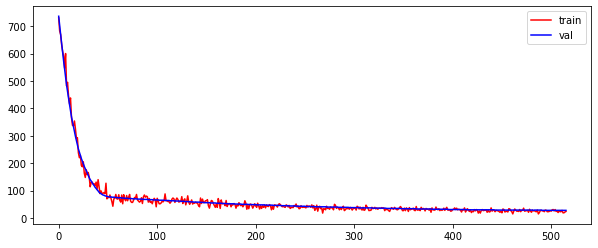

----------
minibatch:0/12
epoch:44--estimated_error:[26.76213268]--val_eror:[28.40040233]
minibatch:1/12
epoch:44--estimated_error:[26.16571885]--val_eror:[28.39958325]
minibatch:2/12
epoch:44--estimated_error:[26.89312272]--val_eror:[28.38307378]
minibatch:3/12
epoch:44--estimated_error:[24.62856716]--val_eror:[28.37633739]
minibatch:4/12
epoch:44--estimated_error:[22.0884231]--val_eror:[28.38811243]
minibatch:5/12
epoch:44--estimated_error:[28.10372505]--val_eror:[28.44722163]
minibatch:6/12
epoch:44--estimated_error:[29.83734072]--val_eror:[28.42352583]
minibatch:7/12
epoch:44--estimated_error:[25.68974522]--val_eror:[28.48021852]
minibatch:8/12
epoch:44--estimated_error:[26.33308176]--val_eror:[28.46934822]
minibatch:9/12
epoch:44--estimated_error:[23.75065872]--val_eror:[28.44703048]
minibatch:10/12
epoch:44--estimated_error:[21.10260446]--val_eror:[28.38794419]
minibatch:11/12
epoch:44--estimated_error:[29.39256264]--val_eror:[28.31090445]


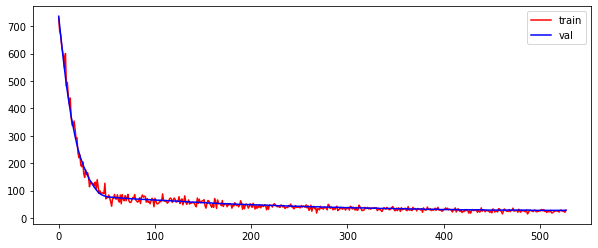

----------
minibatch:0/12
epoch:45--estimated_error:[31.15672249]--val_eror:[28.27884941]
minibatch:1/12
epoch:45--estimated_error:[29.48779596]--val_eror:[28.1583893]
minibatch:2/12
epoch:45--estimated_error:[21.75952686]--val_eror:[28.17916855]
minibatch:3/12
epoch:45--estimated_error:[22.63502564]--val_eror:[28.16462462]
minibatch:4/12
epoch:45--estimated_error:[24.60953748]--val_eror:[28.18070751]
minibatch:5/12
epoch:45--estimated_error:[29.82652236]--val_eror:[28.19465556]
minibatch:6/12
epoch:45--estimated_error:[23.69040768]--val_eror:[28.14530281]
minibatch:7/12
epoch:45--estimated_error:[24.78042453]--val_eror:[28.14180489]
minibatch:8/12
epoch:45--estimated_error:[26.13546879]--val_eror:[28.05605134]
minibatch:9/12
epoch:45--estimated_error:[33.06947339]--val_eror:[28.06068513]
minibatch:10/12
epoch:45--estimated_error:[23.36867356]--val_eror:[27.94606093]
minibatch:11/12
epoch:45--estimated_error:[32.80779386]--val_eror:[27.95918518]


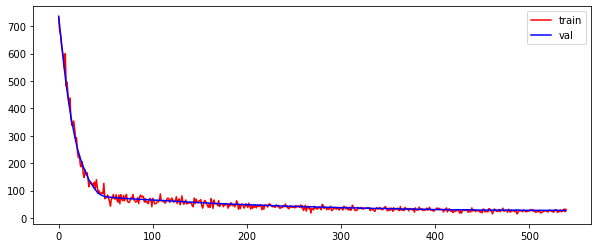

----------
minibatch:0/12
epoch:46--estimated_error:[31.42872343]--val_eror:[28.06883093]
minibatch:1/12
epoch:46--estimated_error:[19.63163101]--val_eror:[28.18471608]
minibatch:2/12
epoch:46--estimated_error:[24.41939127]--val_eror:[28.10994609]
minibatch:3/12
epoch:46--estimated_error:[20.629681]--val_eror:[28.0424661]
minibatch:4/12
epoch:46--estimated_error:[24.26882036]--val_eror:[28.0038842]
minibatch:5/12
epoch:46--estimated_error:[27.56097873]--val_eror:[27.93258687]
minibatch:6/12
epoch:46--estimated_error:[28.12461178]--val_eror:[27.78902608]
minibatch:7/12
epoch:46--estimated_error:[26.65364472]--val_eror:[27.8653516]
minibatch:8/12
epoch:46--estimated_error:[29.94536169]--val_eror:[27.84646323]
minibatch:9/12
epoch:46--estimated_error:[25.56868247]--val_eror:[27.7629169]
minibatch:10/12
epoch:46--estimated_error:[23.2255581]--val_eror:[27.73928145]
minibatch:11/12
epoch:46--estimated_error:[28.43438285]--val_eror:[27.68656908]


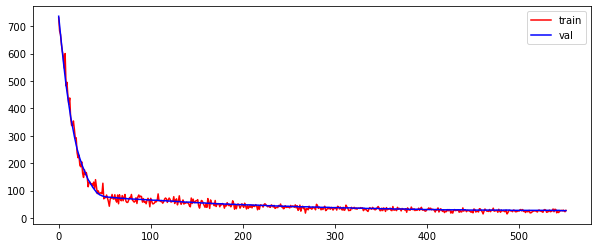

----------
minibatch:0/12
epoch:47--estimated_error:[32.97255165]--val_eror:[27.6452978]
minibatch:1/12
epoch:47--estimated_error:[19.38253046]--val_eror:[27.6832262]
minibatch:2/12
epoch:47--estimated_error:[23.70148181]--val_eror:[27.67597479]
minibatch:3/12
epoch:47--estimated_error:[25.45767307]--val_eror:[27.66330291]
minibatch:4/12
epoch:47--estimated_error:[28.76906536]--val_eror:[27.6241945]
minibatch:5/12
epoch:47--estimated_error:[26.65506835]--val_eror:[27.6213271]
minibatch:6/12
epoch:47--estimated_error:[30.35189985]--val_eror:[27.63115524]
minibatch:7/12
epoch:47--estimated_error:[22.56141059]--val_eror:[27.59617063]
minibatch:8/12
epoch:47--estimated_error:[24.81974807]--val_eror:[27.57382299]
minibatch:9/12
epoch:47--estimated_error:[19.64460608]--val_eror:[27.55478873]
minibatch:10/12
epoch:47--estimated_error:[24.07856341]--val_eror:[27.51804856]
minibatch:11/12
epoch:47--estimated_error:[24.20510956]--val_eror:[27.5881932]


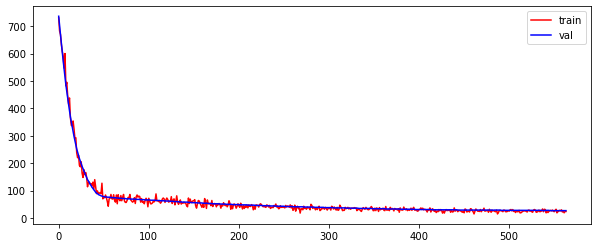

----------
minibatch:0/12
epoch:48--estimated_error:[27.43181365]--val_eror:[27.55429896]
minibatch:1/12
epoch:48--estimated_error:[22.76235467]--val_eror:[27.54167354]
minibatch:2/12
epoch:48--estimated_error:[19.14725331]--val_eror:[27.57222496]
minibatch:3/12
epoch:48--estimated_error:[21.69696499]--val_eror:[27.5681811]
minibatch:4/12
epoch:48--estimated_error:[27.59470971]--val_eror:[27.59885258]
minibatch:5/12
epoch:48--estimated_error:[24.30697474]--val_eror:[27.50317473]
minibatch:6/12
epoch:48--estimated_error:[23.49329385]--val_eror:[27.56368605]
minibatch:7/12
epoch:48--estimated_error:[24.00247872]--val_eror:[27.56010569]
minibatch:8/12
epoch:48--estimated_error:[23.75436828]--val_eror:[27.54285069]
minibatch:9/12
epoch:48--estimated_error:[24.93645336]--val_eror:[27.4611599]
minibatch:10/12
epoch:48--estimated_error:[22.58551836]--val_eror:[27.50045765]
minibatch:11/12
epoch:48--estimated_error:[24.23646483]--val_eror:[27.50498283]


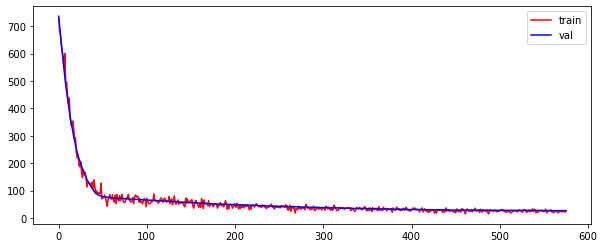

----------
minibatch:0/12
epoch:49--estimated_error:[25.17689953]--val_eror:[27.40575073]
minibatch:1/12
epoch:49--estimated_error:[28.70209273]--val_eror:[27.42586314]
minibatch:2/12
epoch:49--estimated_error:[22.45035977]--val_eror:[27.31807455]
minibatch:3/12
epoch:49--estimated_error:[30.80613317]--val_eror:[27.33474756]
minibatch:4/12
epoch:49--estimated_error:[26.36258032]--val_eror:[27.26960946]
minibatch:5/12
epoch:49--estimated_error:[27.77956146]--val_eror:[27.28772432]
minibatch:6/12
epoch:49--estimated_error:[31.32760762]--val_eror:[27.23915463]
minibatch:7/12
epoch:49--estimated_error:[24.26295752]--val_eror:[27.22932913]
minibatch:8/12
epoch:49--estimated_error:[18.78482613]--val_eror:[27.17746242]
minibatch:9/12
epoch:49--estimated_error:[23.99403672]--val_eror:[27.17826893]
minibatch:10/12
epoch:49--estimated_error:[24.05249802]--val_eror:[27.16690099]
minibatch:11/12
epoch:49--estimated_error:[21.55876995]--val_eror:[27.18604279]


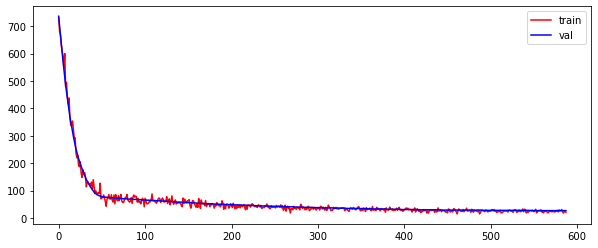

----------
minibatch:0/12
epoch:50--estimated_error:[25.7039593]--val_eror:[27.18059202]
minibatch:1/12
epoch:50--estimated_error:[21.47708952]--val_eror:[27.10418098]
minibatch:2/12
epoch:50--estimated_error:[27.80247538]--val_eror:[27.10366224]
minibatch:3/12
epoch:50--estimated_error:[26.95876518]--val_eror:[27.15117155]
minibatch:4/12
epoch:50--estimated_error:[20.56893234]--val_eror:[27.11675381]
minibatch:5/12
epoch:50--estimated_error:[22.36442996]--val_eror:[27.06627451]
minibatch:6/12
epoch:50--estimated_error:[26.06325721]--val_eror:[27.05896016]
minibatch:7/12
epoch:50--estimated_error:[25.64610189]--val_eror:[27.06129682]
minibatch:8/12
epoch:50--estimated_error:[27.02053745]--val_eror:[26.98187369]
minibatch:9/12
epoch:50--estimated_error:[24.95828028]--val_eror:[26.96543722]
minibatch:10/12
epoch:50--estimated_error:[23.49685043]--val_eror:[26.93109409]
minibatch:11/12
epoch:50--estimated_error:[31.52849356]--val_eror:[26.93376262]


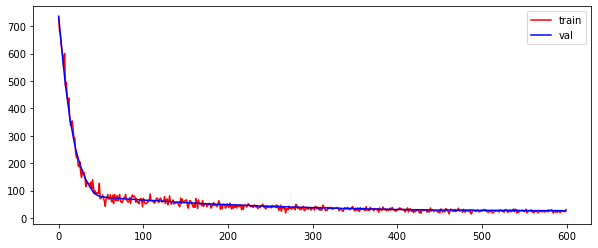

----------
minibatch:0/12
epoch:51--estimated_error:[24.74572664]--val_eror:[26.95765934]
minibatch:1/12
epoch:51--estimated_error:[21.78673184]--val_eror:[26.88103612]
minibatch:2/12
epoch:51--estimated_error:[24.35207679]--val_eror:[26.86061894]
minibatch:3/12
epoch:51--estimated_error:[19.07631239]--val_eror:[26.90679646]
minibatch:4/12
epoch:51--estimated_error:[28.48155092]--val_eror:[26.89871528]
minibatch:5/12
epoch:51--estimated_error:[20.92261688]--val_eror:[26.99308527]
minibatch:6/12
epoch:51--estimated_error:[28.48485549]--val_eror:[26.96755842]
minibatch:7/12
epoch:51--estimated_error:[23.23233375]--val_eror:[26.90699596]
minibatch:8/12
epoch:51--estimated_error:[24.66402954]--val_eror:[26.92298826]
minibatch:9/12
epoch:51--estimated_error:[31.51835407]--val_eror:[26.93920842]
minibatch:10/12
epoch:51--estimated_error:[24.45560551]--val_eror:[26.94962549]
minibatch:11/12
epoch:51--estimated_error:[29.8959439]--val_eror:[26.88036559]


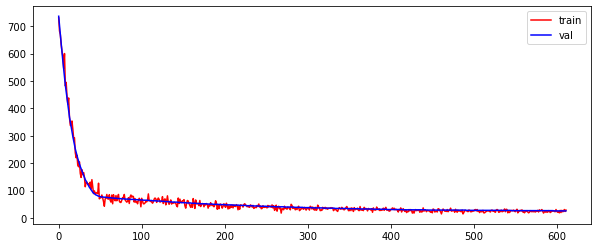

----------
minibatch:0/12
epoch:52--estimated_error:[25.39569846]--val_eror:[26.89791907]
minibatch:1/12
epoch:52--estimated_error:[27.1591956]--val_eror:[26.88249939]
minibatch:2/12
epoch:52--estimated_error:[30.86033651]--val_eror:[26.87486831]
minibatch:3/12
epoch:52--estimated_error:[25.83034294]--val_eror:[26.87458545]
minibatch:4/12
epoch:52--estimated_error:[24.2418011]--val_eror:[26.94661244]
minibatch:5/12
epoch:52--estimated_error:[28.73873251]--val_eror:[26.84809031]
minibatch:6/12
epoch:52--estimated_error:[26.30487395]--val_eror:[26.8054245]
minibatch:7/12
epoch:52--estimated_error:[23.93096835]--val_eror:[26.79457736]
minibatch:8/12
epoch:52--estimated_error:[31.06008054]--val_eror:[26.74845996]
minibatch:9/12
epoch:52--estimated_error:[24.84791496]--val_eror:[26.78581331]
minibatch:10/12
epoch:52--estimated_error:[27.00366201]--val_eror:[26.84391498]
minibatch:11/12
epoch:52--estimated_error:[31.03549408]--val_eror:[26.90669011]


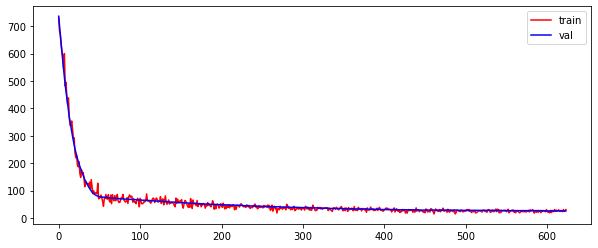

----------
minibatch:0/12
epoch:53--estimated_error:[23.67040541]--val_eror:[26.8600138]
minibatch:1/12
epoch:53--estimated_error:[24.11526024]--val_eror:[26.78506901]
minibatch:2/12
epoch:53--estimated_error:[19.61435]--val_eror:[26.74258713]
minibatch:3/12
epoch:53--estimated_error:[28.2413631]--val_eror:[26.76380988]
minibatch:4/12
epoch:53--estimated_error:[27.38418957]--val_eror:[26.69768453]
minibatch:5/12
epoch:53--estimated_error:[21.00294704]--val_eror:[26.73630601]
minibatch:6/12
epoch:53--estimated_error:[28.99452992]--val_eror:[26.71391674]
minibatch:7/12
epoch:53--estimated_error:[21.30778301]--val_eror:[26.76287015]
minibatch:8/12
epoch:53--estimated_error:[30.05439835]--val_eror:[26.75580195]
minibatch:9/12
epoch:53--estimated_error:[21.34777522]--val_eror:[26.7970174]
minibatch:10/12
epoch:53--estimated_error:[29.45563442]--val_eror:[26.7615324]
minibatch:11/12
epoch:53--estimated_error:[30.11448326]--val_eror:[26.67080883]


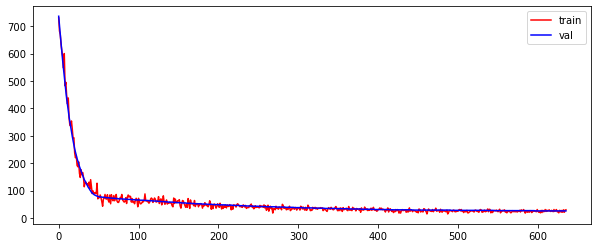

----------
minibatch:0/12
epoch:54--estimated_error:[26.19053988]--val_eror:[26.64799581]
minibatch:1/12
epoch:54--estimated_error:[23.98699939]--val_eror:[26.64611708]
minibatch:2/12
epoch:54--estimated_error:[19.4357405]--val_eror:[26.57002633]
minibatch:3/12
epoch:54--estimated_error:[27.3157526]--val_eror:[26.57880169]
minibatch:4/12
epoch:54--estimated_error:[33.7724429]--val_eror:[26.54289568]
minibatch:5/12
epoch:54--estimated_error:[21.20189521]--val_eror:[26.55071832]
minibatch:6/12
epoch:54--estimated_error:[24.86634683]--val_eror:[26.54863884]
minibatch:7/12
epoch:54--estimated_error:[26.29862917]--val_eror:[26.49263353]
minibatch:8/12
epoch:54--estimated_error:[28.74495542]--val_eror:[26.43232062]
minibatch:9/12
epoch:54--estimated_error:[20.3459595]--val_eror:[26.45332637]
minibatch:10/12
epoch:54--estimated_error:[25.83736744]--val_eror:[26.44871511]
minibatch:11/12
epoch:54--estimated_error:[27.33247419]--val_eror:[26.49773019]


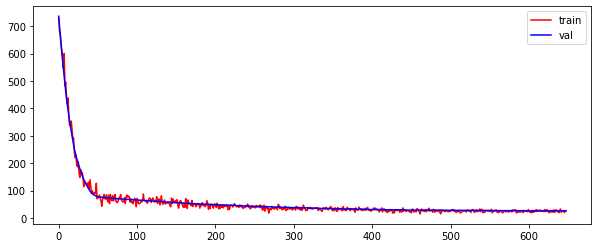

----------
minibatch:0/12
epoch:55--estimated_error:[24.67587649]--val_eror:[26.47594374]
minibatch:1/12
epoch:55--estimated_error:[25.32181457]--val_eror:[26.4710757]
minibatch:2/12
epoch:55--estimated_error:[33.55288051]--val_eror:[26.49048153]
minibatch:3/12
epoch:55--estimated_error:[29.79322458]--val_eror:[26.42571973]
minibatch:4/12
epoch:55--estimated_error:[22.04621147]--val_eror:[26.44094192]
minibatch:5/12
epoch:55--estimated_error:[26.82719389]--val_eror:[26.42334633]
minibatch:6/12
epoch:55--estimated_error:[21.61978643]--val_eror:[26.42708399]
minibatch:7/12
epoch:55--estimated_error:[19.99947221]--val_eror:[26.39685238]
minibatch:8/12
epoch:55--estimated_error:[31.13818915]--val_eror:[26.4012429]
minibatch:9/12
epoch:55--estimated_error:[31.06444044]--val_eror:[26.37617483]
minibatch:10/12
epoch:55--estimated_error:[29.29929486]--val_eror:[26.40659491]
minibatch:11/12
epoch:55--estimated_error:[23.51534841]--val_eror:[26.39432077]


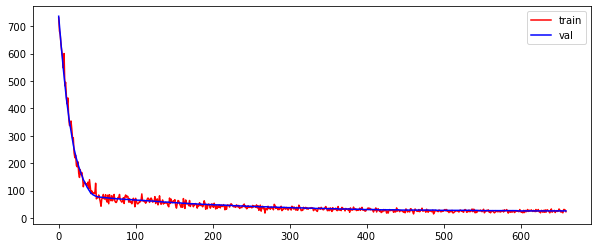

----------
minibatch:0/12
epoch:56--estimated_error:[24.63934613]--val_eror:[26.3870861]
minibatch:1/12
epoch:56--estimated_error:[19.31794414]--val_eror:[26.40746032]
minibatch:2/12
epoch:56--estimated_error:[30.25981901]--val_eror:[26.36524208]
minibatch:3/12
epoch:56--estimated_error:[21.85087739]--val_eror:[26.39457232]
minibatch:4/12
epoch:56--estimated_error:[28.81000988]--val_eror:[26.39759683]
minibatch:5/12
epoch:56--estimated_error:[26.62908576]--val_eror:[26.36092064]
minibatch:6/12
epoch:56--estimated_error:[17.7930246]--val_eror:[26.40773121]
minibatch:7/12
epoch:56--estimated_error:[28.28294415]--val_eror:[26.39560794]
minibatch:8/12
epoch:56--estimated_error:[28.28433589]--val_eror:[26.31684961]
minibatch:9/12
epoch:56--estimated_error:[22.92501605]--val_eror:[26.30383124]
minibatch:10/12
epoch:56--estimated_error:[19.66946273]--val_eror:[26.34971608]
minibatch:11/12
epoch:56--estimated_error:[23.37995896]--val_eror:[26.3797377]


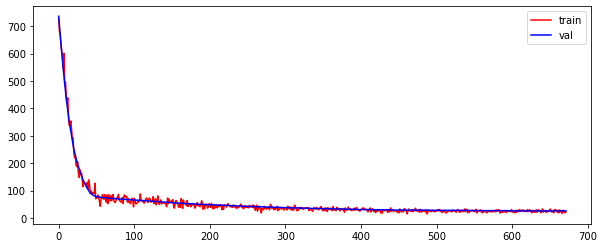

----------
minibatch:0/12
epoch:57--estimated_error:[18.78642481]--val_eror:[26.40052315]
minibatch:1/12
epoch:57--estimated_error:[23.89723952]--val_eror:[26.31487436]
minibatch:2/12
epoch:57--estimated_error:[19.07043547]--val_eror:[26.35208733]
minibatch:3/12
epoch:57--estimated_error:[18.46075948]--val_eror:[26.3157789]
minibatch:4/12
epoch:57--estimated_error:[26.05549558]--val_eror:[26.33079699]
minibatch:5/12
epoch:57--estimated_error:[24.19232732]--val_eror:[26.28989527]
minibatch:6/12
epoch:57--estimated_error:[20.95882825]--val_eror:[26.31801777]
minibatch:7/12
epoch:57--estimated_error:[25.9482071]--val_eror:[26.29437829]
minibatch:8/12
epoch:57--estimated_error:[22.61179229]--val_eror:[26.31573055]
minibatch:9/12
epoch:57--estimated_error:[20.95215561]--val_eror:[26.32877478]
minibatch:10/12
epoch:57--estimated_error:[24.27540637]--val_eror:[26.29297748]
minibatch:11/12
epoch:57--estimated_error:[24.01560534]--val_eror:[26.33461501]


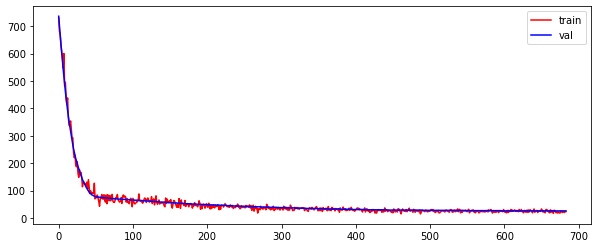

----------
minibatch:0/12
epoch:58--estimated_error:[26.75399302]--val_eror:[26.23475939]
minibatch:1/12
epoch:58--estimated_error:[22.62285682]--val_eror:[26.25034176]
minibatch:2/12
epoch:58--estimated_error:[26.81162972]--val_eror:[26.20104911]
minibatch:3/12
epoch:58--estimated_error:[22.52573227]--val_eror:[26.26024556]
minibatch:4/12
epoch:58--estimated_error:[25.47985614]--val_eror:[26.23587254]
minibatch:5/12
epoch:58--estimated_error:[16.86174266]--val_eror:[26.22168182]
minibatch:6/12
epoch:58--estimated_error:[25.97574555]--val_eror:[26.16627213]
minibatch:7/12
epoch:58--estimated_error:[22.86597538]--val_eror:[26.16010583]
minibatch:8/12
epoch:58--estimated_error:[25.21095655]--val_eror:[26.20300859]
minibatch:9/12
epoch:58--estimated_error:[27.19366297]--val_eror:[26.26055119]
minibatch:10/12
epoch:58--estimated_error:[26.53822908]--val_eror:[26.30677706]
minibatch:11/12
epoch:58--estimated_error:[20.90119856]--val_eror:[26.3487378]


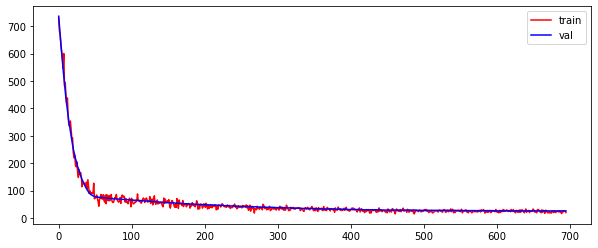

----------
minibatch:0/12
epoch:59--estimated_error:[27.74733706]--val_eror:[26.40101652]
minibatch:1/12
epoch:59--estimated_error:[24.79775565]--val_eror:[26.36897848]
minibatch:2/12
epoch:59--estimated_error:[21.6199384]--val_eror:[26.41187922]
minibatch:3/12
epoch:59--estimated_error:[23.61446924]--val_eror:[26.37175058]
minibatch:4/12
epoch:59--estimated_error:[24.5918615]--val_eror:[26.4080773]
minibatch:5/12
epoch:59--estimated_error:[26.74284162]--val_eror:[26.35228005]
minibatch:6/12
epoch:59--estimated_error:[25.35807931]--val_eror:[26.26460459]
minibatch:7/12
epoch:59--estimated_error:[28.58597383]--val_eror:[26.26831662]
minibatch:8/12
epoch:59--estimated_error:[30.85659297]--val_eror:[26.26288315]
minibatch:9/12
epoch:59--estimated_error:[24.31985486]--val_eror:[26.25649188]
minibatch:10/12
epoch:59--estimated_error:[25.73135153]--val_eror:[26.21453059]
minibatch:11/12
epoch:59--estimated_error:[20.59114544]--val_eror:[26.22403169]


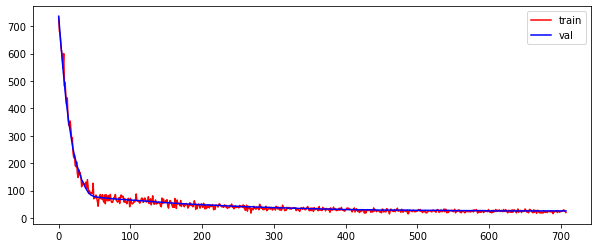

----------
minibatch:0/12
epoch:60--estimated_error:[22.44934472]--val_eror:[26.20526171]
minibatch:1/12
epoch:60--estimated_error:[24.53129813]--val_eror:[26.09237239]
minibatch:2/12
epoch:60--estimated_error:[23.18278774]--val_eror:[26.04577347]
minibatch:3/12
epoch:60--estimated_error:[23.78445953]--val_eror:[25.98445945]
minibatch:4/12
epoch:60--estimated_error:[23.31925947]--val_eror:[25.97777407]
minibatch:5/12
epoch:60--estimated_error:[26.59921007]--val_eror:[25.95265805]
minibatch:6/12
epoch:60--estimated_error:[23.33713027]--val_eror:[26.01426809]
minibatch:7/12
epoch:60--estimated_error:[26.04774895]--val_eror:[26.00801404]
minibatch:8/12
epoch:60--estimated_error:[23.47674233]--val_eror:[26.018798]
minibatch:9/12
epoch:60--estimated_error:[28.69270363]--val_eror:[26.10112055]
minibatch:10/12
epoch:60--estimated_error:[22.70765069]--val_eror:[26.07946365]
minibatch:11/12
epoch:60--estimated_error:[20.7377728]--val_eror:[26.04470769]


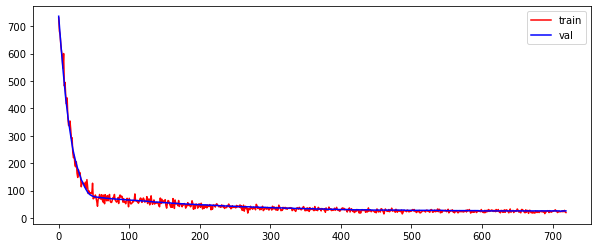

----------
minibatch:0/12
epoch:61--estimated_error:[25.55228799]--val_eror:[26.03756781]
minibatch:1/12
epoch:61--estimated_error:[23.25130518]--val_eror:[25.91750961]
minibatch:2/12
epoch:61--estimated_error:[27.4863024]--val_eror:[25.85242629]
minibatch:3/12
epoch:61--estimated_error:[21.44131324]--val_eror:[25.85344619]
minibatch:4/12
epoch:61--estimated_error:[27.20811939]--val_eror:[25.89115584]
minibatch:5/12
epoch:61--estimated_error:[27.90521794]--val_eror:[25.84626183]
minibatch:6/12
epoch:61--estimated_error:[25.1613727]--val_eror:[25.8818689]
minibatch:7/12
epoch:61--estimated_error:[24.10463407]--val_eror:[25.90839261]
minibatch:8/12
epoch:61--estimated_error:[26.08306342]--val_eror:[25.83477679]
minibatch:9/12
epoch:61--estimated_error:[24.31503714]--val_eror:[25.82166655]
minibatch:10/12
epoch:61--estimated_error:[18.99177144]--val_eror:[25.95135965]
minibatch:11/12
epoch:61--estimated_error:[21.60216028]--val_eror:[26.02282116]


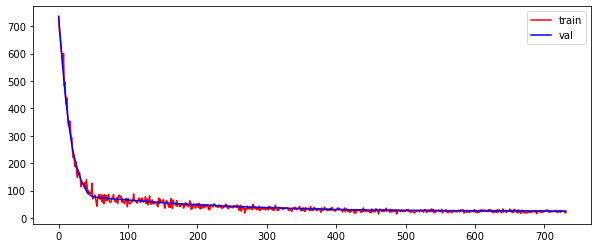

----------
minibatch:0/12
epoch:62--estimated_error:[25.00068]--val_eror:[25.96481528]
minibatch:1/12
epoch:62--estimated_error:[24.76254317]--val_eror:[25.99009213]
minibatch:2/12
epoch:62--estimated_error:[23.56301894]--val_eror:[25.98534091]
minibatch:3/12
epoch:62--estimated_error:[30.44552187]--val_eror:[25.92290923]
minibatch:4/12
epoch:62--estimated_error:[21.98082818]--val_eror:[25.86630728]
minibatch:5/12
epoch:62--estimated_error:[18.93526236]--val_eror:[25.89609438]
minibatch:6/12
epoch:62--estimated_error:[23.46070049]--val_eror:[25.92992806]
minibatch:7/12
epoch:62--estimated_error:[22.79514106]--val_eror:[25.96454266]
minibatch:8/12
epoch:62--estimated_error:[23.88119345]--val_eror:[25.99431897]
minibatch:9/12
epoch:62--estimated_error:[23.38769459]--val_eror:[25.9347902]
minibatch:10/12
epoch:62--estimated_error:[24.48452699]--val_eror:[25.90770579]
minibatch:11/12
epoch:62--estimated_error:[25.46634096]--val_eror:[25.8475118]


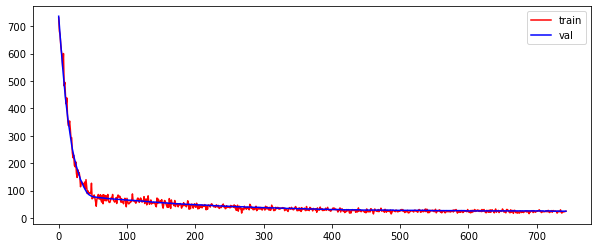

----------
minibatch:0/12
epoch:63--estimated_error:[29.24416872]--val_eror:[25.88363636]
minibatch:1/12
epoch:63--estimated_error:[25.82953384]--val_eror:[25.8974277]
minibatch:2/12
epoch:63--estimated_error:[25.15698173]--val_eror:[25.9272448]
minibatch:3/12
epoch:63--estimated_error:[26.827076]--val_eror:[25.96428485]
minibatch:4/12
epoch:63--estimated_error:[23.37657758]--val_eror:[25.97033321]
minibatch:5/12
epoch:63--estimated_error:[22.77601192]--val_eror:[25.86739179]
minibatch:6/12
epoch:63--estimated_error:[24.6195497]--val_eror:[25.94583743]
minibatch:7/12
epoch:63--estimated_error:[25.10591116]--val_eror:[26.03406523]
minibatch:8/12
epoch:63--estimated_error:[30.55504704]--val_eror:[25.95956114]
minibatch:9/12
epoch:63--estimated_error:[19.68844715]--val_eror:[25.87792569]
minibatch:10/12
epoch:63--estimated_error:[26.05578806]--val_eror:[25.87017514]
minibatch:11/12
epoch:63--estimated_error:[25.19154722]--val_eror:[25.92316962]


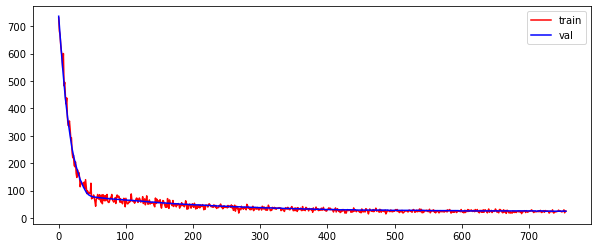

----------
minibatch:0/12
epoch:64--estimated_error:[30.85317219]--val_eror:[25.87928869]
minibatch:1/12
epoch:64--estimated_error:[23.02223419]--val_eror:[25.75468592]
minibatch:2/12
epoch:64--estimated_error:[23.71343766]--val_eror:[25.76713911]
minibatch:3/12
epoch:64--estimated_error:[25.00415988]--val_eror:[25.7641784]
minibatch:4/12
epoch:64--estimated_error:[20.66516364]--val_eror:[25.78596137]
minibatch:5/12
epoch:64--estimated_error:[23.13188709]--val_eror:[25.7724806]
minibatch:6/12
epoch:64--estimated_error:[31.02890038]--val_eror:[25.82266494]
minibatch:7/12
epoch:64--estimated_error:[20.42902922]--val_eror:[25.88040447]
minibatch:8/12
epoch:64--estimated_error:[23.88819542]--val_eror:[25.81525767]
minibatch:9/12
epoch:64--estimated_error:[24.00823751]--val_eror:[25.80769945]
minibatch:10/12
epoch:64--estimated_error:[21.46226326]--val_eror:[25.88180484]
minibatch:11/12
epoch:64--estimated_error:[25.67021835]--val_eror:[25.92672426]


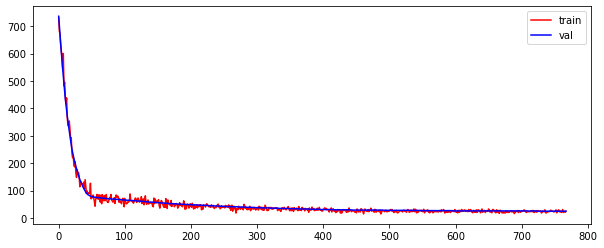

----------
minibatch:0/12
epoch:65--estimated_error:[20.65918508]--val_eror:[25.86582189]
minibatch:1/12
epoch:65--estimated_error:[23.00480322]--val_eror:[25.83687233]
minibatch:2/12
epoch:65--estimated_error:[24.12607998]--val_eror:[25.82173716]
minibatch:3/12
epoch:65--estimated_error:[23.55450022]--val_eror:[25.89033466]
minibatch:4/12
epoch:65--estimated_error:[25.56596194]--val_eror:[25.89547719]
minibatch:5/12
epoch:65--estimated_error:[27.19627802]--val_eror:[25.92948773]
minibatch:6/12
epoch:65--estimated_error:[26.70472995]--val_eror:[25.85022661]
minibatch:7/12
epoch:65--estimated_error:[21.60357225]--val_eror:[25.8429923]
minibatch:8/12
epoch:65--estimated_error:[20.04031675]--val_eror:[25.83312759]
minibatch:9/12
epoch:65--estimated_error:[19.74297436]--val_eror:[25.88064104]
minibatch:10/12
epoch:65--estimated_error:[28.63386066]--val_eror:[25.94459917]
minibatch:11/12
epoch:65--estimated_error:[24.30745167]--val_eror:[26.0126315]


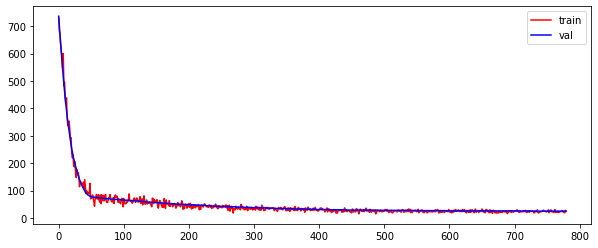

----------
minibatch:0/12
epoch:66--estimated_error:[26.7854698]--val_eror:[26.02031465]
minibatch:1/12
epoch:66--estimated_error:[20.33703588]--val_eror:[26.08731919]
minibatch:2/12
epoch:66--estimated_error:[28.8602807]--val_eror:[26.0288972]
minibatch:3/12
epoch:66--estimated_error:[25.99001822]--val_eror:[26.02556066]
minibatch:4/12
epoch:66--estimated_error:[25.09175066]--val_eror:[26.04910119]
minibatch:5/12
epoch:66--estimated_error:[21.81037661]--val_eror:[26.00468826]
minibatch:6/12
epoch:66--estimated_error:[23.49931941]--val_eror:[26.00281429]
minibatch:7/12
epoch:66--estimated_error:[22.58439159]--val_eror:[25.96853935]
minibatch:8/12
epoch:66--estimated_error:[24.49961187]--val_eror:[26.00027258]
minibatch:9/12
epoch:66--estimated_error:[25.59544656]--val_eror:[25.96671082]
minibatch:10/12
epoch:66--estimated_error:[25.86820271]--val_eror:[25.92211081]
minibatch:11/12
epoch:66--estimated_error:[21.16233335]--val_eror:[25.99897356]


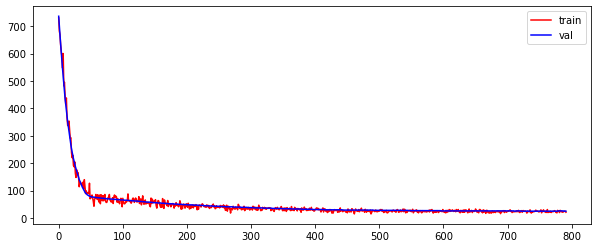

----------
minibatch:0/12
epoch:67--estimated_error:[28.94829796]--val_eror:[26.04022946]
minibatch:1/12
epoch:67--estimated_error:[20.24084896]--val_eror:[25.90637824]
minibatch:2/12
epoch:67--estimated_error:[23.97234108]--val_eror:[25.92739753]
minibatch:3/12
epoch:67--estimated_error:[26.18553159]--val_eror:[25.87035028]
minibatch:4/12
epoch:67--estimated_error:[28.12695596]--val_eror:[25.84951111]
minibatch:5/12
epoch:67--estimated_error:[30.40746556]--val_eror:[25.85069503]
minibatch:6/12
epoch:67--estimated_error:[18.30491938]--val_eror:[25.77834108]
minibatch:7/12
epoch:67--estimated_error:[24.21442984]--val_eror:[25.73794173]
minibatch:8/12
epoch:67--estimated_error:[24.94772255]--val_eror:[25.72371718]
minibatch:9/12
epoch:67--estimated_error:[27.97816946]--val_eror:[25.78433106]
minibatch:10/12
epoch:67--estimated_error:[34.60792672]--val_eror:[25.75583861]
minibatch:11/12
epoch:67--estimated_error:[13.45715784]--val_eror:[25.78166535]


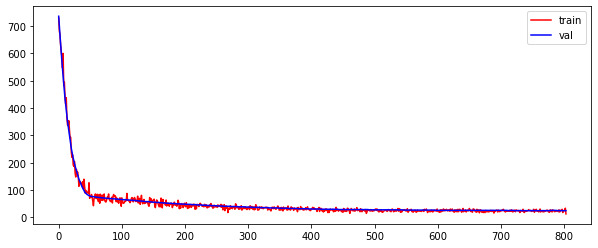

----------
minibatch:0/12
epoch:68--estimated_error:[23.69336154]--val_eror:[25.77817586]
minibatch:1/12
epoch:68--estimated_error:[17.90941776]--val_eror:[25.75997669]
minibatch:2/12
epoch:68--estimated_error:[27.74702927]--val_eror:[25.75046367]
minibatch:3/12
epoch:68--estimated_error:[21.6536362]--val_eror:[25.75427641]
minibatch:4/12
epoch:68--estimated_error:[25.63492322]--val_eror:[25.81054655]
minibatch:5/12
epoch:68--estimated_error:[25.17799744]--val_eror:[25.80814618]
minibatch:6/12
epoch:68--estimated_error:[18.1181131]--val_eror:[25.6849777]
minibatch:7/12
epoch:68--estimated_error:[20.28925554]--val_eror:[25.74118056]
minibatch:8/12
epoch:68--estimated_error:[21.4170904]--val_eror:[25.74680794]
minibatch:9/12
epoch:68--estimated_error:[26.8920741]--val_eror:[25.69787791]
minibatch:10/12
epoch:68--estimated_error:[21.88046133]--val_eror:[25.70871019]
minibatch:11/12
epoch:68--estimated_error:[20.82582438]--val_eror:[25.64323757]


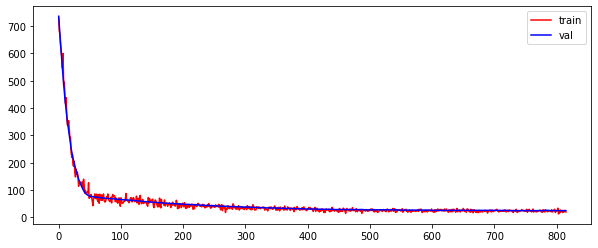

----------
minibatch:0/12
epoch:69--estimated_error:[27.2857618]--val_eror:[25.63915369]
minibatch:1/12
epoch:69--estimated_error:[19.45821894]--val_eror:[25.71289478]
minibatch:2/12
epoch:69--estimated_error:[28.20408906]--val_eror:[25.65774293]
minibatch:3/12
epoch:69--estimated_error:[24.33524365]--val_eror:[25.76290775]
minibatch:4/12
epoch:69--estimated_error:[23.54649832]--val_eror:[25.76571086]
minibatch:5/12
epoch:69--estimated_error:[25.62310014]--val_eror:[25.72899828]
minibatch:6/12
epoch:69--estimated_error:[29.1859205]--val_eror:[25.71308366]
minibatch:7/12
epoch:69--estimated_error:[26.67717799]--val_eror:[25.70925818]
minibatch:8/12
epoch:69--estimated_error:[23.57082776]--val_eror:[25.7129182]
minibatch:9/12
epoch:69--estimated_error:[31.14325426]--val_eror:[25.71892256]
minibatch:10/12
epoch:69--estimated_error:[22.86722396]--val_eror:[25.71600863]
minibatch:11/12
epoch:69--estimated_error:[19.49768029]--val_eror:[25.71161777]


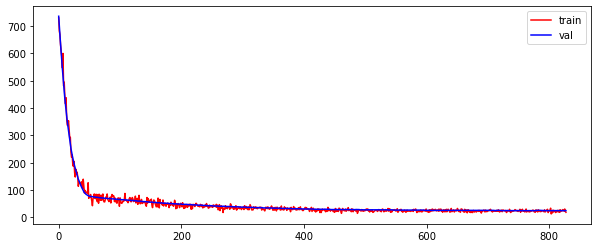

----------
minibatch:0/12
epoch:70--estimated_error:[25.45992799]--val_eror:[25.65485535]
minibatch:1/12
epoch:70--estimated_error:[17.90974743]--val_eror:[25.68458667]
minibatch:2/12
epoch:70--estimated_error:[18.37171469]--val_eror:[25.59113708]
minibatch:3/12
epoch:70--estimated_error:[24.70527142]--val_eror:[25.56298303]
minibatch:4/12
epoch:70--estimated_error:[37.56871438]--val_eror:[25.48858325]
minibatch:5/12
epoch:70--estimated_error:[25.17411324]--val_eror:[25.52908003]
minibatch:6/12
epoch:70--estimated_error:[23.48964321]--val_eror:[25.51892598]
minibatch:7/12
epoch:70--estimated_error:[29.97090797]--val_eror:[25.59147109]
minibatch:8/12
epoch:70--estimated_error:[16.29183737]--val_eror:[25.60494197]
minibatch:9/12
epoch:70--estimated_error:[17.58516786]--val_eror:[25.53559589]
minibatch:10/12
epoch:70--estimated_error:[18.48886093]--val_eror:[25.48965324]
minibatch:11/12
epoch:70--estimated_error:[23.83138589]--val_eror:[25.44804338]


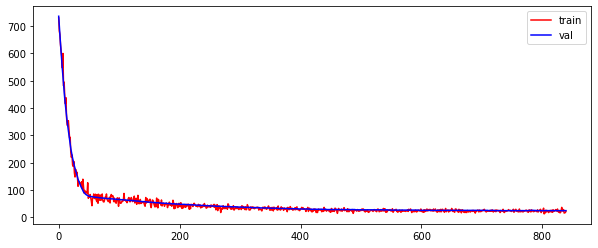

----------
minibatch:0/12
epoch:71--estimated_error:[26.41860748]--val_eror:[25.4243307]
minibatch:1/12
epoch:71--estimated_error:[19.25858955]--val_eror:[25.45940568]
minibatch:2/12
epoch:71--estimated_error:[23.56592019]--val_eror:[25.40194249]
minibatch:3/12
epoch:71--estimated_error:[19.56677567]--val_eror:[25.39738933]
minibatch:4/12
epoch:71--estimated_error:[20.79949284]--val_eror:[25.33822951]
minibatch:5/12
epoch:71--estimated_error:[24.39903203]--val_eror:[25.28884501]
minibatch:6/12
epoch:71--estimated_error:[20.83365009]--val_eror:[25.35038232]
minibatch:7/12
epoch:71--estimated_error:[28.53679636]--val_eror:[25.27456862]
minibatch:8/12
epoch:71--estimated_error:[21.18306104]--val_eror:[25.26864185]
minibatch:9/12
epoch:71--estimated_error:[16.48892847]--val_eror:[25.27550877]
minibatch:10/12
epoch:71--estimated_error:[18.76893565]--val_eror:[25.25594501]
minibatch:11/12
epoch:71--estimated_error:[19.7192967]--val_eror:[25.31755004]


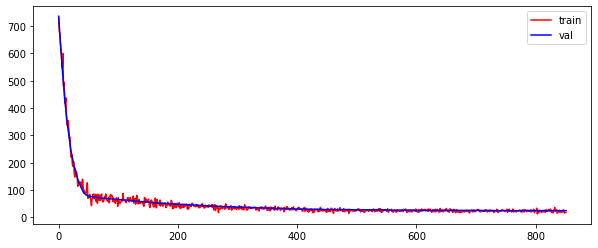

----------
minibatch:0/12
epoch:72--estimated_error:[26.00152331]--val_eror:[25.34218895]
minibatch:1/12
epoch:72--estimated_error:[22.14221908]--val_eror:[25.4191934]
minibatch:2/12
epoch:72--estimated_error:[23.05550824]--val_eror:[25.38908314]
minibatch:3/12
epoch:72--estimated_error:[28.20161265]--val_eror:[25.38547523]
minibatch:4/12
epoch:72--estimated_error:[25.69572905]--val_eror:[25.45665163]
minibatch:5/12
epoch:72--estimated_error:[21.19281532]--val_eror:[25.52043766]
minibatch:6/12
epoch:72--estimated_error:[21.02053242]--val_eror:[25.51289051]
minibatch:7/12
epoch:72--estimated_error:[27.50936266]--val_eror:[25.53920281]
minibatch:8/12
epoch:72--estimated_error:[25.36514019]--val_eror:[25.55501622]
minibatch:9/12
epoch:72--estimated_error:[23.09075263]--val_eror:[25.61980954]
minibatch:10/12
epoch:72--estimated_error:[22.65758105]--val_eror:[25.61653259]
minibatch:11/12
epoch:72--estimated_error:[25.58609301]--val_eror:[25.56098732]


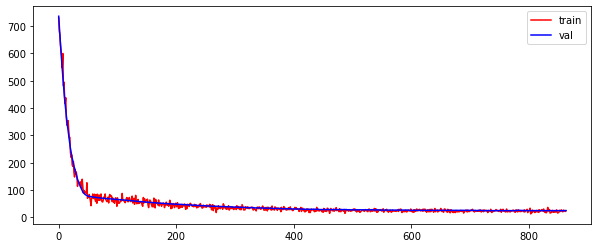

----------
minibatch:0/12
epoch:73--estimated_error:[24.78957061]--val_eror:[25.49491788]
minibatch:1/12
epoch:73--estimated_error:[27.38497805]--val_eror:[25.49237647]
minibatch:2/12
epoch:73--estimated_error:[22.6471852]--val_eror:[25.47557085]
minibatch:3/12
epoch:73--estimated_error:[29.08281125]--val_eror:[25.44041753]
minibatch:4/12
epoch:73--estimated_error:[21.65352396]--val_eror:[25.47796425]
minibatch:5/12
epoch:73--estimated_error:[25.01624601]--val_eror:[25.48407503]
minibatch:6/12
epoch:73--estimated_error:[24.43638572]--val_eror:[25.50493722]
minibatch:7/12
epoch:73--estimated_error:[26.08695136]--val_eror:[25.53933239]
minibatch:8/12
epoch:73--estimated_error:[24.24350128]--val_eror:[25.52401998]
minibatch:9/12
epoch:73--estimated_error:[23.81898281]--val_eror:[25.5208606]
minibatch:10/12
epoch:73--estimated_error:[24.43955407]--val_eror:[25.55483765]
minibatch:11/12
epoch:73--estimated_error:[23.75603637]--val_eror:[25.59402201]


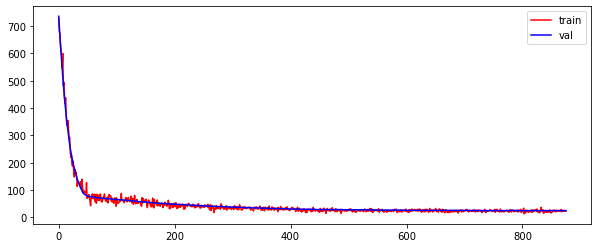

----------
minibatch:0/12
epoch:74--estimated_error:[28.64112405]--val_eror:[25.62485519]
minibatch:1/12
epoch:74--estimated_error:[20.35635057]--val_eror:[25.55742233]
minibatch:2/12
epoch:74--estimated_error:[22.16827311]--val_eror:[25.55033151]
minibatch:3/12
epoch:74--estimated_error:[25.36031827]--val_eror:[25.51552808]
minibatch:4/12
epoch:74--estimated_error:[22.28024295]--val_eror:[25.5596944]
minibatch:5/12
epoch:74--estimated_error:[23.9416569]--val_eror:[25.57186604]
minibatch:6/12
epoch:74--estimated_error:[27.56990831]--val_eror:[25.46259027]
minibatch:7/12
epoch:74--estimated_error:[24.05615693]--val_eror:[25.43096712]
minibatch:8/12
epoch:74--estimated_error:[20.72433192]--val_eror:[25.42660617]
minibatch:9/12
epoch:74--estimated_error:[20.46436427]--val_eror:[25.42819823]
minibatch:10/12
epoch:74--estimated_error:[22.55796387]--val_eror:[25.44866594]
minibatch:11/12
epoch:74--estimated_error:[27.54905129]--val_eror:[25.38046259]


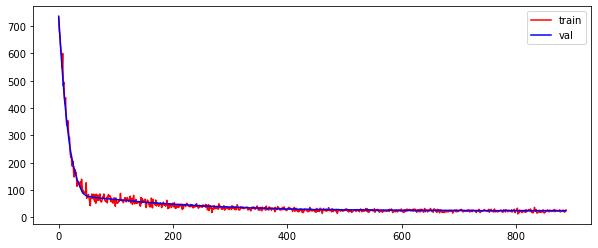

----------
minibatch:0/12
epoch:75--estimated_error:[22.08476873]--val_eror:[25.48779286]
minibatch:1/12
epoch:75--estimated_error:[24.54568076]--val_eror:[25.50745024]
minibatch:2/12
epoch:75--estimated_error:[27.0601688]--val_eror:[25.53254616]
minibatch:3/12
epoch:75--estimated_error:[18.45200451]--val_eror:[25.60288624]
minibatch:4/12
epoch:75--estimated_error:[22.8889769]--val_eror:[25.59376901]
minibatch:5/12
epoch:75--estimated_error:[18.41623658]--val_eror:[25.58063736]
minibatch:6/12
epoch:75--estimated_error:[20.36187416]--val_eror:[25.5759769]
minibatch:7/12
epoch:75--estimated_error:[23.5338735]--val_eror:[25.5550204]
minibatch:8/12
epoch:75--estimated_error:[25.61981161]--val_eror:[25.58256309]
minibatch:9/12
epoch:75--estimated_error:[24.19698759]--val_eror:[25.57760175]
minibatch:10/12
epoch:75--estimated_error:[27.02691562]--val_eror:[25.59722705]
minibatch:11/12
epoch:75--estimated_error:[29.12285013]--val_eror:[25.5641027]


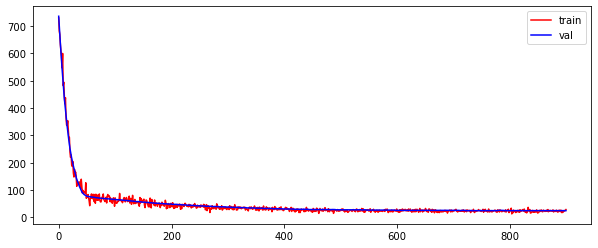

----------
minibatch:0/12
epoch:76--estimated_error:[21.52031196]--val_eror:[25.61547679]
minibatch:1/12
epoch:76--estimated_error:[22.19231008]--val_eror:[25.51593467]
minibatch:2/12
epoch:76--estimated_error:[26.41078743]--val_eror:[25.50865371]
minibatch:3/12
epoch:76--estimated_error:[21.29969937]--val_eror:[25.40971377]
minibatch:4/12
epoch:76--estimated_error:[21.59149198]--val_eror:[25.42800672]
minibatch:5/12
epoch:76--estimated_error:[21.99816394]--val_eror:[25.4598649]
minibatch:6/12
epoch:76--estimated_error:[20.92245709]--val_eror:[25.47101601]
minibatch:7/12
epoch:76--estimated_error:[18.44706428]--val_eror:[25.46666855]
minibatch:8/12
epoch:76--estimated_error:[20.79226372]--val_eror:[25.5072126]
minibatch:9/12
epoch:76--estimated_error:[25.41760055]--val_eror:[25.46791445]
minibatch:10/12
epoch:76--estimated_error:[21.62630263]--val_eror:[25.33028387]
minibatch:11/12
epoch:76--estimated_error:[24.67419188]--val_eror:[25.34099516]


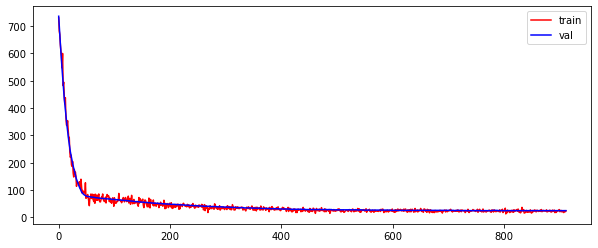

----------
minibatch:0/12
epoch:77--estimated_error:[23.04347581]--val_eror:[25.31743207]
minibatch:1/12
epoch:77--estimated_error:[24.00448236]--val_eror:[25.27466915]
minibatch:2/12
epoch:77--estimated_error:[23.91659127]--val_eror:[25.16946356]
minibatch:3/12
epoch:77--estimated_error:[20.07783996]--val_eror:[25.20672219]
minibatch:4/12
epoch:77--estimated_error:[26.37175329]--val_eror:[25.26613899]
minibatch:5/12
epoch:77--estimated_error:[22.16285475]--val_eror:[25.3006282]
minibatch:6/12
epoch:77--estimated_error:[23.88090964]--val_eror:[25.24497252]
minibatch:7/12
epoch:77--estimated_error:[23.61220503]--val_eror:[25.19139492]
minibatch:8/12
epoch:77--estimated_error:[20.42560417]--val_eror:[25.15088144]
minibatch:9/12
epoch:77--estimated_error:[25.26523833]--val_eror:[25.19582758]
minibatch:10/12
epoch:77--estimated_error:[24.44126516]--val_eror:[25.18281945]
minibatch:11/12
epoch:77--estimated_error:[22.61455275]--val_eror:[25.18740285]


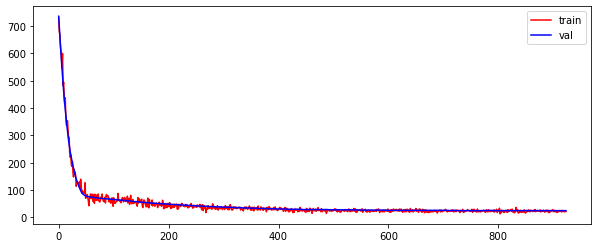

----------
minibatch:0/12
epoch:78--estimated_error:[23.6683879]--val_eror:[25.25881809]
minibatch:1/12
epoch:78--estimated_error:[22.84759714]--val_eror:[25.36140818]
minibatch:2/12
epoch:78--estimated_error:[25.39553939]--val_eror:[25.26008769]
minibatch:3/12
epoch:78--estimated_error:[22.30775134]--val_eror:[25.24921551]
minibatch:4/12
epoch:78--estimated_error:[27.68390512]--val_eror:[25.19801192]
minibatch:5/12
epoch:78--estimated_error:[25.88348366]--val_eror:[25.18673843]
minibatch:6/12
epoch:78--estimated_error:[28.22803158]--val_eror:[25.23830681]
minibatch:7/12
epoch:78--estimated_error:[18.39971689]--val_eror:[25.25401803]
minibatch:8/12
epoch:78--estimated_error:[25.25153181]--val_eror:[25.24219217]
minibatch:9/12
epoch:78--estimated_error:[18.57305794]--val_eror:[25.19273174]
minibatch:10/12
epoch:78--estimated_error:[23.76944291]--val_eror:[25.23988913]
minibatch:11/12
epoch:78--estimated_error:[20.49556801]--val_eror:[25.2296033]


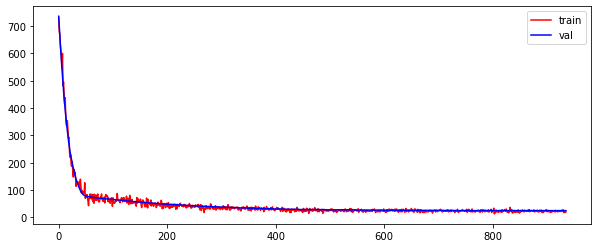

----------
minibatch:0/12
epoch:79--estimated_error:[22.42814675]--val_eror:[25.20717562]
minibatch:1/12
epoch:79--estimated_error:[21.65486877]--val_eror:[25.23863801]
minibatch:2/12
epoch:79--estimated_error:[23.63085471]--val_eror:[25.20832519]
minibatch:3/12
epoch:79--estimated_error:[19.24262598]--val_eror:[25.2390997]
minibatch:4/12
epoch:79--estimated_error:[23.05039358]--val_eror:[25.21926534]
minibatch:5/12
epoch:79--estimated_error:[21.00457319]--val_eror:[25.20847021]
minibatch:6/12
epoch:79--estimated_error:[23.0451098]--val_eror:[25.22964]
minibatch:7/12
epoch:79--estimated_error:[22.01068571]--val_eror:[25.23680176]
minibatch:8/12
epoch:79--estimated_error:[26.76296254]--val_eror:[25.28700701]
minibatch:9/12
epoch:79--estimated_error:[22.07014962]--val_eror:[25.25825917]
minibatch:10/12
epoch:79--estimated_error:[24.34939534]--val_eror:[25.27750122]
minibatch:11/12
epoch:79--estimated_error:[21.83946984]--val_eror:[25.1963917]


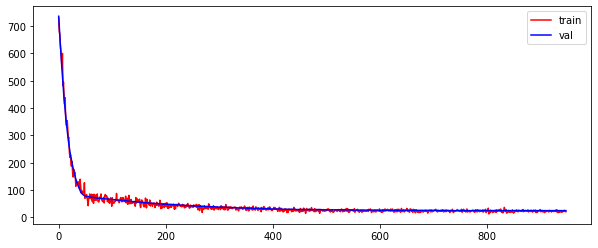

----------
minibatch:0/12
epoch:80--estimated_error:[28.09321822]--val_eror:[25.18509411]
minibatch:1/12
epoch:80--estimated_error:[23.13375941]--val_eror:[25.21695036]
minibatch:2/12
epoch:80--estimated_error:[19.00914608]--val_eror:[25.21961931]
minibatch:3/12
epoch:80--estimated_error:[22.08602826]--val_eror:[25.21708845]
minibatch:4/12
epoch:80--estimated_error:[22.60939671]--val_eror:[25.18886494]
minibatch:5/12
epoch:80--estimated_error:[24.94468651]--val_eror:[25.19103574]
minibatch:6/12
epoch:80--estimated_error:[31.26919588]--val_eror:[25.27846361]
minibatch:7/12
epoch:80--estimated_error:[26.39072162]--val_eror:[25.40418417]
minibatch:8/12
epoch:80--estimated_error:[25.15279477]--val_eror:[25.40078534]
minibatch:9/12
epoch:80--estimated_error:[17.40105263]--val_eror:[25.37006753]
minibatch:10/12
epoch:80--estimated_error:[17.49618087]--val_eror:[25.32961748]
minibatch:11/12
epoch:80--estimated_error:[21.73310194]--val_eror:[25.32230597]


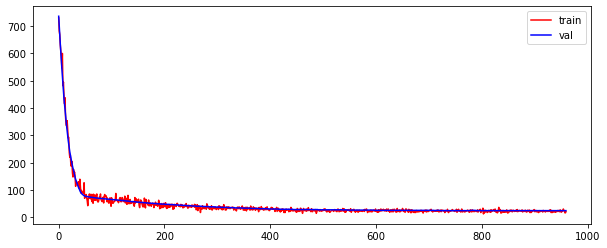

----------
minibatch:0/12
epoch:81--estimated_error:[25.8296831]--val_eror:[25.31602313]
minibatch:1/12
epoch:81--estimated_error:[23.83177479]--val_eror:[25.35779772]
minibatch:2/12
epoch:81--estimated_error:[22.57338216]--val_eror:[25.40285454]
minibatch:3/12
epoch:81--estimated_error:[23.81650852]--val_eror:[25.28588836]
minibatch:4/12
epoch:81--estimated_error:[22.21650342]--val_eror:[25.2262034]
minibatch:5/12
epoch:81--estimated_error:[24.59108676]--val_eror:[25.1781597]
minibatch:6/12
epoch:81--estimated_error:[20.24253103]--val_eror:[25.10184459]
minibatch:7/12
epoch:81--estimated_error:[26.37508048]--val_eror:[25.18615721]
minibatch:8/12
epoch:81--estimated_error:[19.33127517]--val_eror:[25.15972025]
minibatch:9/12
epoch:81--estimated_error:[24.35498541]--val_eror:[25.14420329]
minibatch:10/12
epoch:81--estimated_error:[25.3903351]--val_eror:[25.15933294]
minibatch:11/12
epoch:81--estimated_error:[22.82467325]--val_eror:[25.16716757]


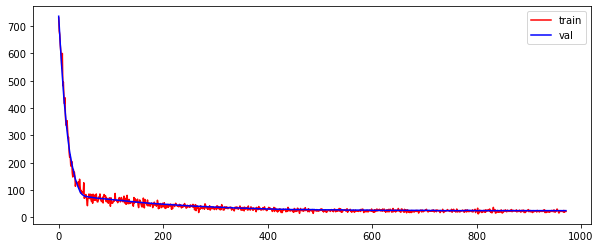

----------
minibatch:0/12
epoch:82--estimated_error:[22.96199892]--val_eror:[25.13949561]
minibatch:1/12
epoch:82--estimated_error:[19.45142881]--val_eror:[25.11788087]
minibatch:2/12
epoch:82--estimated_error:[19.39413573]--val_eror:[25.07700404]
minibatch:3/12
epoch:82--estimated_error:[30.3815222]--val_eror:[25.04467324]
minibatch:4/12
epoch:82--estimated_error:[21.64838248]--val_eror:[25.13540058]
minibatch:5/12
epoch:82--estimated_error:[21.48741925]--val_eror:[25.21176829]
minibatch:6/12
epoch:82--estimated_error:[20.11795367]--val_eror:[25.23171774]
minibatch:7/12
epoch:82--estimated_error:[24.84066627]--val_eror:[25.10891635]
minibatch:8/12
epoch:82--estimated_error:[17.35637739]--val_eror:[25.13412605]
minibatch:9/12
epoch:82--estimated_error:[23.70394964]--val_eror:[25.10673539]
minibatch:10/12
epoch:82--estimated_error:[25.05240389]--val_eror:[24.99992142]
minibatch:11/12
epoch:82--estimated_error:[30.60859484]--val_eror:[25.02825691]


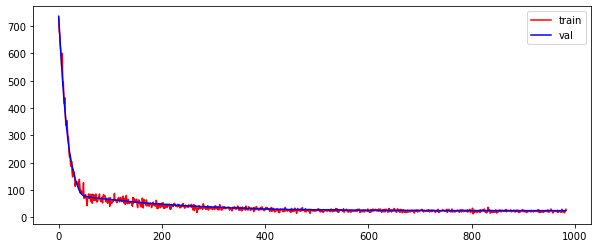

----------
minibatch:0/12
epoch:83--estimated_error:[26.84867028]--val_eror:[25.02937209]
minibatch:1/12
epoch:83--estimated_error:[27.84601876]--val_eror:[24.9924417]
minibatch:2/12
epoch:83--estimated_error:[25.01834055]--val_eror:[24.94543097]
minibatch:3/12
epoch:83--estimated_error:[25.52670251]--val_eror:[24.96586975]
minibatch:4/12
epoch:83--estimated_error:[21.58742209]--val_eror:[24.99070095]
minibatch:5/12
epoch:83--estimated_error:[23.93446267]--val_eror:[25.00414475]
minibatch:6/12
epoch:83--estimated_error:[24.21014894]--val_eror:[24.91420074]
minibatch:7/12
epoch:83--estimated_error:[22.28420675]--val_eror:[24.88801534]
minibatch:8/12
epoch:83--estimated_error:[22.84751144]--val_eror:[24.95458339]
minibatch:9/12
epoch:83--estimated_error:[21.64397537]--val_eror:[24.94224013]
minibatch:10/12
epoch:83--estimated_error:[22.58194409]--val_eror:[24.94486405]
minibatch:11/12
epoch:83--estimated_error:[20.8127984]--val_eror:[25.00574515]


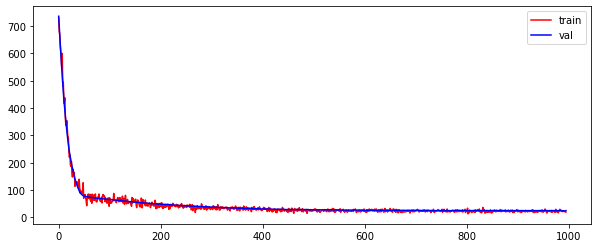

----------
minibatch:0/12
epoch:84--estimated_error:[30.24926649]--val_eror:[24.92526889]
minibatch:1/12
epoch:84--estimated_error:[22.84968334]--val_eror:[24.84319697]
minibatch:2/12
epoch:84--estimated_error:[22.91489798]--val_eror:[24.7701432]
minibatch:3/12
epoch:84--estimated_error:[19.42850211]--val_eror:[24.77094358]
minibatch:4/12
epoch:84--estimated_error:[21.69215073]--val_eror:[24.77213614]
minibatch:5/12
epoch:84--estimated_error:[21.65171079]--val_eror:[24.75540739]
minibatch:6/12
epoch:84--estimated_error:[23.12195117]--val_eror:[24.79812212]
minibatch:7/12
epoch:84--estimated_error:[24.39600023]--val_eror:[24.92806783]
minibatch:8/12
epoch:84--estimated_error:[29.97267946]--val_eror:[24.8871528]
minibatch:9/12
epoch:84--estimated_error:[17.63062936]--val_eror:[24.92223535]
minibatch:10/12
epoch:84--estimated_error:[18.16527798]--val_eror:[24.9402964]
minibatch:11/12
epoch:84--estimated_error:[22.60142011]--val_eror:[24.92931446]


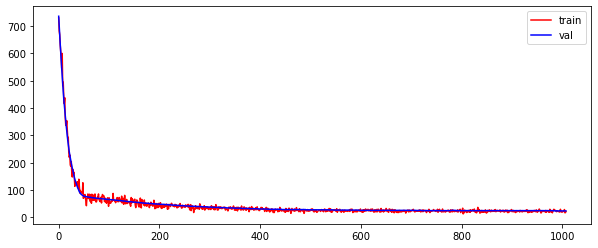

----------
minibatch:0/12
epoch:85--estimated_error:[23.25207921]--val_eror:[24.93352759]
minibatch:1/12
epoch:85--estimated_error:[25.00692109]--val_eror:[24.9169305]
minibatch:2/12
epoch:85--estimated_error:[21.44460041]--val_eror:[24.87705638]
minibatch:3/12
epoch:85--estimated_error:[28.33917652]--val_eror:[24.88943264]
minibatch:4/12
epoch:85--estimated_error:[26.6021212]--val_eror:[24.87227258]
minibatch:5/12
epoch:85--estimated_error:[23.55593644]--val_eror:[24.84545469]
minibatch:6/12
epoch:85--estimated_error:[22.79485028]--val_eror:[24.82064424]
minibatch:7/12
epoch:85--estimated_error:[24.18718376]--val_eror:[24.77182408]
minibatch:8/12
epoch:85--estimated_error:[20.307433]--val_eror:[24.7558762]
minibatch:9/12
epoch:85--estimated_error:[24.21533462]--val_eror:[24.77503786]
minibatch:10/12
epoch:85--estimated_error:[27.0489464]--val_eror:[24.81236795]
minibatch:11/12
epoch:85--estimated_error:[23.52424252]--val_eror:[24.78110423]


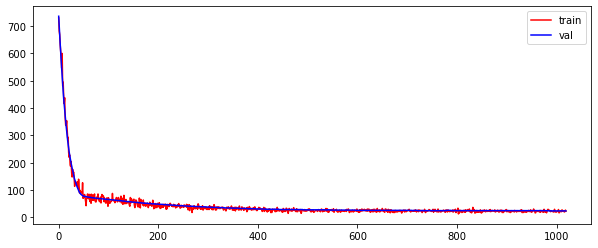

----------
minibatch:0/12
epoch:86--estimated_error:[21.06443189]--val_eror:[24.78660579]
minibatch:1/12
epoch:86--estimated_error:[20.88877676]--val_eror:[24.73569341]
minibatch:2/12
epoch:86--estimated_error:[22.2701637]--val_eror:[24.73052316]
minibatch:3/12
epoch:86--estimated_error:[26.12383265]--val_eror:[24.73733723]
minibatch:4/12
epoch:86--estimated_error:[21.00906162]--val_eror:[24.81120698]
minibatch:5/12
epoch:86--estimated_error:[21.76002393]--val_eror:[24.7738411]
minibatch:6/12
epoch:86--estimated_error:[24.24187124]--val_eror:[24.71552348]
minibatch:7/12
epoch:86--estimated_error:[23.01605413]--val_eror:[24.72180604]
minibatch:8/12
epoch:86--estimated_error:[18.43861239]--val_eror:[24.80452506]
minibatch:9/12
epoch:86--estimated_error:[23.46237771]--val_eror:[24.83140364]
minibatch:10/12
epoch:86--estimated_error:[24.36201412]--val_eror:[24.8702234]
minibatch:11/12
epoch:86--estimated_error:[21.4034788]--val_eror:[24.84793468]


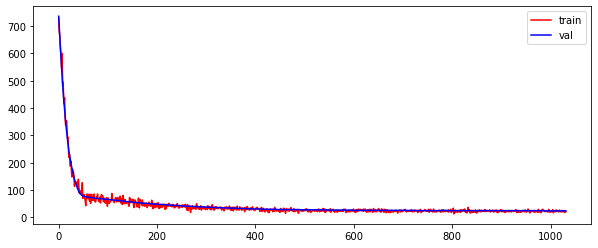

----------
minibatch:0/12
epoch:87--estimated_error:[20.92653537]--val_eror:[24.86289556]
minibatch:1/12
epoch:87--estimated_error:[18.09038387]--val_eror:[24.79503281]
minibatch:2/12
epoch:87--estimated_error:[22.05830081]--val_eror:[24.83271185]
minibatch:3/12
epoch:87--estimated_error:[25.50298771]--val_eror:[24.85338567]
minibatch:4/12
epoch:87--estimated_error:[22.97735374]--val_eror:[24.84635806]
minibatch:5/12
epoch:87--estimated_error:[19.32778931]--val_eror:[24.80945199]
minibatch:6/12
epoch:87--estimated_error:[23.93284014]--val_eror:[24.84489199]
minibatch:7/12
epoch:87--estimated_error:[31.99199558]--val_eror:[24.88398537]
minibatch:8/12
epoch:87--estimated_error:[22.20957303]--val_eror:[24.96436955]
minibatch:9/12
epoch:87--estimated_error:[25.40557162]--val_eror:[24.98433198]
minibatch:10/12
epoch:87--estimated_error:[23.67615981]--val_eror:[24.99028101]
minibatch:11/12
epoch:87--estimated_error:[21.50234457]--val_eror:[24.98324999]


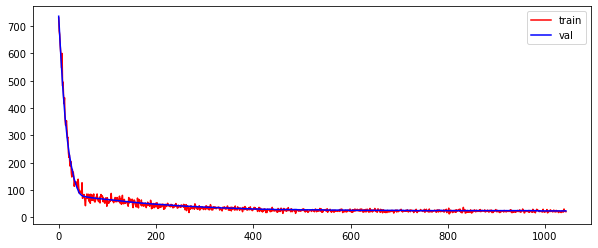

----------
minibatch:0/12
epoch:88--estimated_error:[22.36434623]--val_eror:[24.92942516]
minibatch:1/12
epoch:88--estimated_error:[29.00684534]--val_eror:[25.01477711]
minibatch:2/12
epoch:88--estimated_error:[26.61514205]--val_eror:[25.02341602]
minibatch:3/12
epoch:88--estimated_error:[21.66087932]--val_eror:[24.99197984]
minibatch:4/12
epoch:88--estimated_error:[21.38202186]--val_eror:[24.95950213]
minibatch:5/12
epoch:88--estimated_error:[24.71995468]--val_eror:[24.90665759]
minibatch:6/12
epoch:88--estimated_error:[19.13211132]--val_eror:[24.97532032]
minibatch:7/12
epoch:88--estimated_error:[21.99024705]--val_eror:[25.03564644]
minibatch:8/12
epoch:88--estimated_error:[23.76963474]--val_eror:[24.97407073]
minibatch:9/12
epoch:88--estimated_error:[20.58536917]--val_eror:[24.98864963]
minibatch:10/12
epoch:88--estimated_error:[23.62875821]--val_eror:[24.94300792]
minibatch:11/12
epoch:88--estimated_error:[22.71554341]--val_eror:[24.91814]


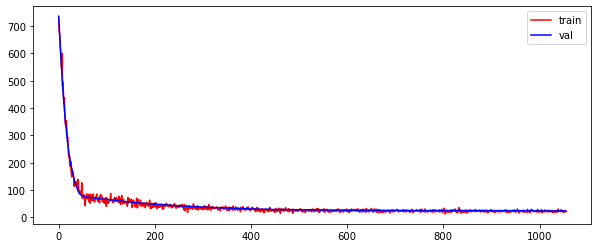

----------
minibatch:0/12
epoch:89--estimated_error:[18.22622373]--val_eror:[24.90252712]
minibatch:1/12
epoch:89--estimated_error:[22.62312406]--val_eror:[24.91602967]
minibatch:2/12
epoch:89--estimated_error:[23.08797094]--val_eror:[24.90512244]
minibatch:3/12
epoch:89--estimated_error:[26.63794671]--val_eror:[24.88872618]
minibatch:4/12
epoch:89--estimated_error:[23.46142501]--val_eror:[24.91840057]
minibatch:5/12
epoch:89--estimated_error:[20.89450568]--val_eror:[24.96457394]
minibatch:6/12
epoch:89--estimated_error:[18.51713262]--val_eror:[25.01821809]
minibatch:7/12
epoch:89--estimated_error:[21.91354221]--val_eror:[25.02354061]
minibatch:8/12
epoch:89--estimated_error:[22.63923393]--val_eror:[25.06665609]
minibatch:9/12
epoch:89--estimated_error:[27.73978335]--val_eror:[25.06579445]
minibatch:10/12
epoch:89--estimated_error:[20.3038417]--val_eror:[25.08432856]
minibatch:11/12
epoch:89--estimated_error:[22.11788615]--val_eror:[25.05710987]


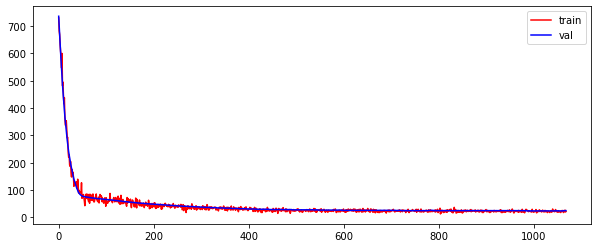

----------
minibatch:0/12
epoch:90--estimated_error:[22.45076458]--val_eror:[25.07418184]
minibatch:1/12
epoch:90--estimated_error:[20.48867467]--val_eror:[25.01827807]
minibatch:2/12
epoch:90--estimated_error:[22.91665405]--val_eror:[24.98369968]
minibatch:3/12
epoch:90--estimated_error:[22.92532695]--val_eror:[24.96210502]
minibatch:4/12
epoch:90--estimated_error:[29.44518624]--val_eror:[24.92671213]
minibatch:5/12
epoch:90--estimated_error:[26.83887993]--val_eror:[24.91829013]
minibatch:6/12
epoch:90--estimated_error:[19.98549578]--val_eror:[24.92079419]
minibatch:7/12
epoch:90--estimated_error:[22.07299485]--val_eror:[24.93686974]
minibatch:8/12
epoch:90--estimated_error:[21.36355068]--val_eror:[24.92412811]
minibatch:9/12
epoch:90--estimated_error:[23.4357153]--val_eror:[24.90100776]
minibatch:10/12
epoch:90--estimated_error:[24.80457074]--val_eror:[24.82659866]
minibatch:11/12
epoch:90--estimated_error:[22.28413619]--val_eror:[24.86286789]


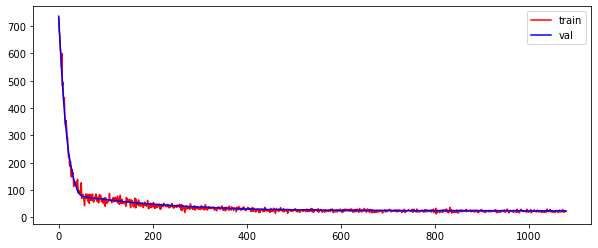

----------
minibatch:0/12
epoch:91--estimated_error:[20.09883392]--val_eror:[24.82469067]
minibatch:1/12
epoch:91--estimated_error:[24.43538668]--val_eror:[24.81328482]
minibatch:2/12
epoch:91--estimated_error:[22.15152646]--val_eror:[24.8495616]
minibatch:3/12
epoch:91--estimated_error:[20.26769469]--val_eror:[24.90185326]
minibatch:4/12
epoch:91--estimated_error:[26.43983968]--val_eror:[24.93666955]
minibatch:5/12
epoch:91--estimated_error:[21.42920093]--val_eror:[24.97702389]
minibatch:6/12
epoch:91--estimated_error:[21.70191939]--val_eror:[24.91929212]
minibatch:7/12
epoch:91--estimated_error:[17.42193624]--val_eror:[24.95511761]
minibatch:8/12
epoch:91--estimated_error:[22.02416238]--val_eror:[24.95493905]
minibatch:9/12
epoch:91--estimated_error:[21.72443064]--val_eror:[24.92565988]
minibatch:10/12
epoch:91--estimated_error:[19.44435327]--val_eror:[24.9181454]
minibatch:11/12
epoch:91--estimated_error:[18.062861]--val_eror:[24.8594004]


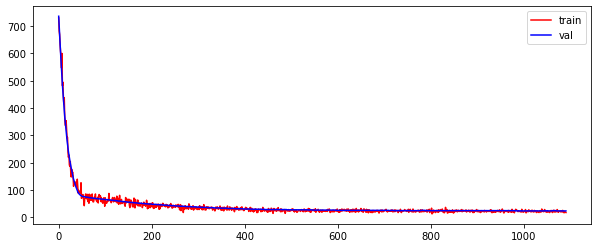

----------
minibatch:0/12
epoch:92--estimated_error:[22.40307476]--val_eror:[24.85091467]
minibatch:1/12
epoch:92--estimated_error:[24.91331307]--val_eror:[24.81514965]
minibatch:2/12
epoch:92--estimated_error:[25.91574344]--val_eror:[24.82141754]
minibatch:3/12
epoch:92--estimated_error:[24.56660515]--val_eror:[24.91763314]
minibatch:4/12
epoch:92--estimated_error:[21.68751422]--val_eror:[24.96665687]
minibatch:5/12
epoch:92--estimated_error:[22.73883884]--val_eror:[24.88386384]
minibatch:6/12
epoch:92--estimated_error:[21.94068283]--val_eror:[24.97444458]
minibatch:7/12
epoch:92--estimated_error:[25.19094281]--val_eror:[25.03608881]
minibatch:8/12
epoch:92--estimated_error:[25.65510828]--val_eror:[25.12861838]
minibatch:9/12
epoch:92--estimated_error:[19.88047896]--val_eror:[25.01643275]
minibatch:10/12
epoch:92--estimated_error:[27.67413741]--val_eror:[24.93085058]
minibatch:11/12
epoch:92--estimated_error:[22.8119142]--val_eror:[24.86359726]


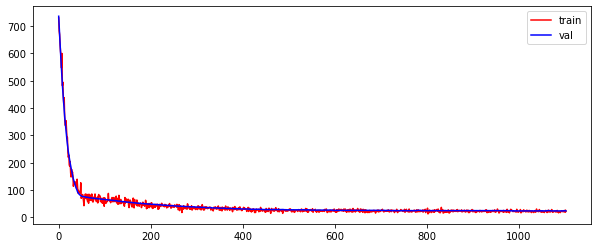

----------
minibatch:0/12
epoch:93--estimated_error:[21.81924597]--val_eror:[24.85100831]
minibatch:1/12
epoch:93--estimated_error:[24.32194677]--val_eror:[24.84035225]
minibatch:2/12
epoch:93--estimated_error:[26.55431132]--val_eror:[24.83360263]
minibatch:3/12
epoch:93--estimated_error:[19.88317648]--val_eror:[24.77458578]
minibatch:4/12
epoch:93--estimated_error:[25.99600744]--val_eror:[24.68731403]
minibatch:5/12
epoch:93--estimated_error:[18.82653106]--val_eror:[24.74339965]
minibatch:6/12
epoch:93--estimated_error:[25.81887245]--val_eror:[24.76501908]
minibatch:7/12
epoch:93--estimated_error:[23.562624]--val_eror:[24.83700939]
minibatch:8/12
epoch:93--estimated_error:[15.43651513]--val_eror:[24.83125506]
minibatch:9/12
epoch:93--estimated_error:[22.30015706]--val_eror:[24.85156728]
minibatch:10/12
epoch:93--estimated_error:[19.63536728]--val_eror:[24.77257114]
minibatch:11/12
epoch:93--estimated_error:[22.68281566]--val_eror:[24.76343433]


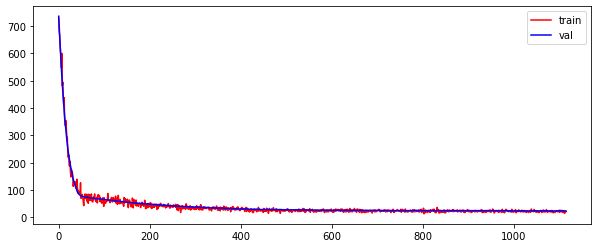

----------
minibatch:0/12
epoch:94--estimated_error:[30.27949542]--val_eror:[24.80094704]
minibatch:1/12
epoch:94--estimated_error:[18.40424924]--val_eror:[24.75720518]
minibatch:2/12
epoch:94--estimated_error:[24.96481291]--val_eror:[24.74700791]
minibatch:3/12
epoch:94--estimated_error:[22.462409]--val_eror:[24.76947252]
minibatch:4/12
epoch:94--estimated_error:[18.80601436]--val_eror:[24.82138027]
minibatch:5/12
epoch:94--estimated_error:[21.80457615]--val_eror:[24.79281988]
minibatch:6/12
epoch:94--estimated_error:[25.10682991]--val_eror:[24.77779348]
minibatch:7/12
epoch:94--estimated_error:[23.30552613]--val_eror:[24.85997969]
minibatch:8/12
epoch:94--estimated_error:[27.23918025]--val_eror:[24.79983391]
minibatch:9/12
epoch:94--estimated_error:[21.52170972]--val_eror:[24.91557254]
minibatch:10/12
epoch:94--estimated_error:[19.68422676]--val_eror:[24.92869462]
minibatch:11/12
epoch:94--estimated_error:[24.14804949]--val_eror:[24.9408291]


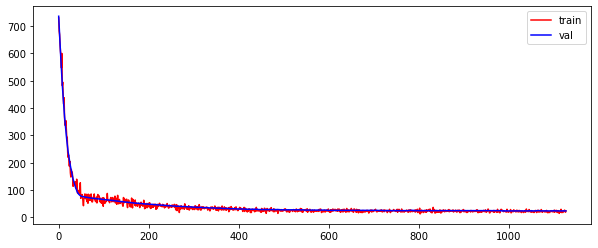

----------
minibatch:0/12
epoch:95--estimated_error:[21.89048187]--val_eror:[24.91110428]
minibatch:1/12
epoch:95--estimated_error:[29.90514893]--val_eror:[24.88374697]
minibatch:2/12
epoch:95--estimated_error:[21.78327372]--val_eror:[24.84886324]
minibatch:3/12
epoch:95--estimated_error:[17.78902878]--val_eror:[24.82128464]
minibatch:4/12
epoch:95--estimated_error:[23.39154235]--val_eror:[24.85449402]
minibatch:5/12
epoch:95--estimated_error:[23.09943747]--val_eror:[24.89125567]
minibatch:6/12
epoch:95--estimated_error:[22.29418003]--val_eror:[24.91679913]
minibatch:7/12
epoch:95--estimated_error:[21.70135237]--val_eror:[24.90255732]
minibatch:8/12
epoch:95--estimated_error:[24.60573915]--val_eror:[24.85542928]
minibatch:9/12
epoch:95--estimated_error:[21.47928268]--val_eror:[24.84573196]
minibatch:10/12
epoch:95--estimated_error:[22.51518112]--val_eror:[24.84254226]
minibatch:11/12
epoch:95--estimated_error:[28.3747262]--val_eror:[24.88251414]


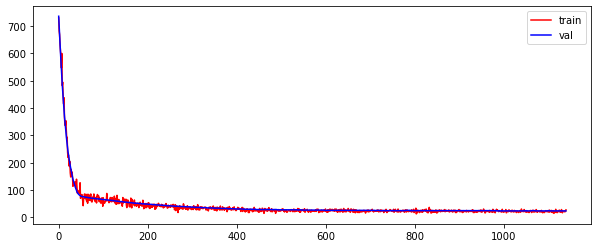

----------
minibatch:0/12
epoch:96--estimated_error:[21.56761433]--val_eror:[24.97574591]
minibatch:1/12
epoch:96--estimated_error:[23.32988368]--val_eror:[25.00478595]
minibatch:2/12
epoch:96--estimated_error:[27.25678604]--val_eror:[24.95377541]
minibatch:3/12
epoch:96--estimated_error:[22.78495885]--val_eror:[24.92945963]
minibatch:4/12
epoch:96--estimated_error:[18.79107321]--val_eror:[24.98754518]
minibatch:5/12
epoch:96--estimated_error:[22.84757578]--val_eror:[24.97566825]
minibatch:6/12
epoch:96--estimated_error:[24.03776866]--val_eror:[24.94239111]
minibatch:7/12
epoch:96--estimated_error:[20.63943201]--val_eror:[25.0226588]
minibatch:8/12
epoch:96--estimated_error:[25.73857924]--val_eror:[24.95058178]
minibatch:9/12
epoch:96--estimated_error:[19.55751255]--val_eror:[24.83204558]
minibatch:10/12
epoch:96--estimated_error:[29.59341114]--val_eror:[24.8138058]
minibatch:11/12
epoch:96--estimated_error:[21.81608697]--val_eror:[24.75119355]


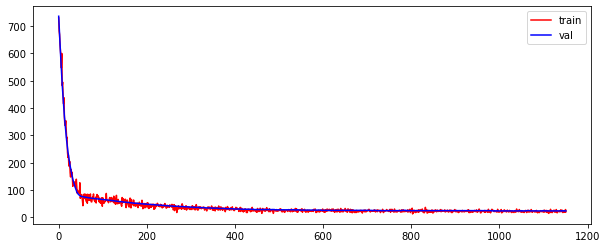

----------
minibatch:0/12
epoch:97--estimated_error:[25.0768899]--val_eror:[24.7018361]
minibatch:1/12
epoch:97--estimated_error:[20.34560763]--val_eror:[24.66424771]
minibatch:2/12
epoch:97--estimated_error:[22.4546296]--val_eror:[24.69870166]
minibatch:3/12
epoch:97--estimated_error:[23.32765552]--val_eror:[24.65643349]
minibatch:4/12
epoch:97--estimated_error:[26.15161654]--val_eror:[24.70883126]
minibatch:5/12
epoch:97--estimated_error:[24.14743985]--val_eror:[24.75029886]
minibatch:6/12
epoch:97--estimated_error:[28.09856106]--val_eror:[24.80549859]
minibatch:7/12
epoch:97--estimated_error:[19.03760816]--val_eror:[24.84558278]
minibatch:8/12
epoch:97--estimated_error:[27.30606038]--val_eror:[24.92199282]
minibatch:9/12
epoch:97--estimated_error:[24.30250965]--val_eror:[24.98703128]
minibatch:10/12
epoch:97--estimated_error:[22.517493]--val_eror:[24.88644207]
minibatch:11/12
epoch:97--estimated_error:[24.51948675]--val_eror:[24.96792601]


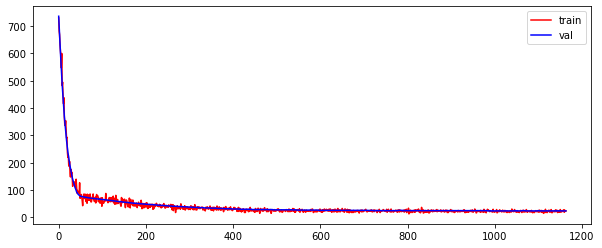

----------
minibatch:0/12
epoch:98--estimated_error:[21.94299482]--val_eror:[24.94276052]
minibatch:1/12
epoch:98--estimated_error:[19.37953693]--val_eror:[24.82480877]
minibatch:2/12
epoch:98--estimated_error:[20.13107961]--val_eror:[24.78227816]
minibatch:3/12
epoch:98--estimated_error:[20.30847158]--val_eror:[24.75642882]
minibatch:4/12
epoch:98--estimated_error:[24.0784859]--val_eror:[24.75344616]
minibatch:5/12
epoch:98--estimated_error:[24.38036702]--val_eror:[24.6733581]
minibatch:6/12
epoch:98--estimated_error:[22.11254859]--val_eror:[24.62389952]
minibatch:7/12
epoch:98--estimated_error:[21.9071281]--val_eror:[24.6038987]
minibatch:8/12
epoch:98--estimated_error:[24.48864953]--val_eror:[24.65467346]
minibatch:9/12
epoch:98--estimated_error:[18.48321747]--val_eror:[24.68652986]
minibatch:10/12
epoch:98--estimated_error:[20.17699739]--val_eror:[24.69591754]
minibatch:11/12
epoch:98--estimated_error:[26.29135965]--val_eror:[24.67558137]


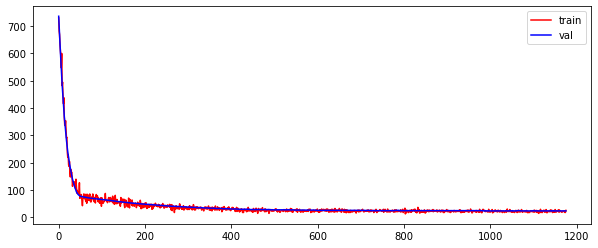

----------
minibatch:0/12
epoch:99--estimated_error:[19.4946499]--val_eror:[24.64807225]
minibatch:1/12
epoch:99--estimated_error:[20.50496234]--val_eror:[24.62704418]
minibatch:2/12
epoch:99--estimated_error:[25.98979555]--val_eror:[24.58227007]
minibatch:3/12
epoch:99--estimated_error:[28.3313236]--val_eror:[24.57090898]
minibatch:4/12
epoch:99--estimated_error:[26.90522446]--val_eror:[24.52931687]
minibatch:5/12
epoch:99--estimated_error:[24.8858898]--val_eror:[24.54483917]
minibatch:6/12
epoch:99--estimated_error:[25.12531211]--val_eror:[24.51467351]
minibatch:7/12
epoch:99--estimated_error:[22.80358512]--val_eror:[24.58270685]
minibatch:8/12
epoch:99--estimated_error:[22.77861254]--val_eror:[24.59017411]
minibatch:9/12
epoch:99--estimated_error:[20.24515036]--val_eror:[24.53128806]
minibatch:10/12
epoch:99--estimated_error:[22.02984074]--val_eror:[24.51208637]
minibatch:11/12
epoch:99--estimated_error:[19.45252965]--val_eror:[24.49407011]


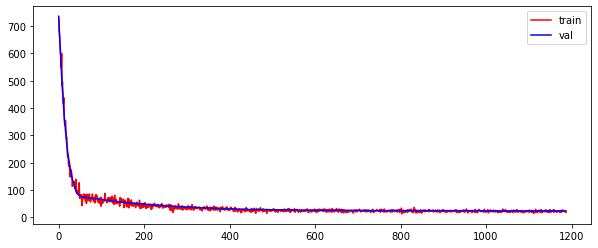

----------
minibatch:0/12
epoch:100--estimated_error:[22.29852668]--val_eror:[24.5412593]
minibatch:1/12
epoch:100--estimated_error:[22.80603071]--val_eror:[24.52404032]
minibatch:2/12
epoch:100--estimated_error:[25.75743513]--val_eror:[24.53274875]
minibatch:3/12
epoch:100--estimated_error:[18.10502841]--val_eror:[24.62031325]
minibatch:4/12
epoch:100--estimated_error:[21.73737525]--val_eror:[24.60663954]
minibatch:5/12
epoch:100--estimated_error:[17.3937859]--val_eror:[24.67530677]
minibatch:6/12
epoch:100--estimated_error:[24.10606137]--val_eror:[24.70089615]
minibatch:7/12
epoch:100--estimated_error:[24.03329093]--val_eror:[24.68718292]
minibatch:8/12
epoch:100--estimated_error:[17.47089786]--val_eror:[24.63705722]
minibatch:9/12
epoch:100--estimated_error:[24.01058996]--val_eror:[24.66244442]
minibatch:10/12
epoch:100--estimated_error:[22.93712228]--val_eror:[24.62350869]
minibatch:11/12
epoch:100--estimated_error:[28.02870347]--val_eror:[24.68022092]


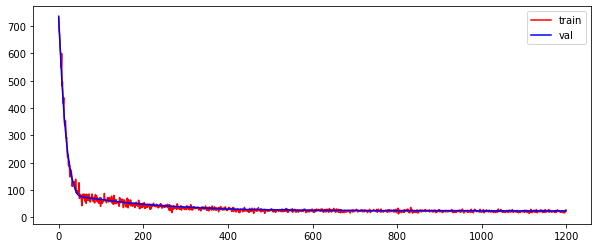

----------
minibatch:0/12
epoch:101--estimated_error:[20.74595525]--val_eror:[24.65271409]
minibatch:1/12
epoch:101--estimated_error:[20.95943953]--val_eror:[24.66053274]
minibatch:2/12
epoch:101--estimated_error:[25.19888811]--val_eror:[24.58961674]
minibatch:3/12
epoch:101--estimated_error:[18.89211366]--val_eror:[24.65129086]
minibatch:4/12
epoch:101--estimated_error:[24.92138238]--val_eror:[24.6371014]
minibatch:5/12
epoch:101--estimated_error:[21.2895225]--val_eror:[24.64487676]
minibatch:6/12
epoch:101--estimated_error:[21.66061398]--val_eror:[24.59749427]
minibatch:7/12
epoch:101--estimated_error:[18.20092913]--val_eror:[24.55658331]
minibatch:8/12
epoch:101--estimated_error:[21.3267838]--val_eror:[24.54789642]
minibatch:9/12
epoch:101--estimated_error:[24.72938851]--val_eror:[24.67855792]
minibatch:10/12
epoch:101--estimated_error:[23.13834841]--val_eror:[24.71244262]
minibatch:11/12
epoch:101--estimated_error:[22.94344861]--val_eror:[24.72900984]


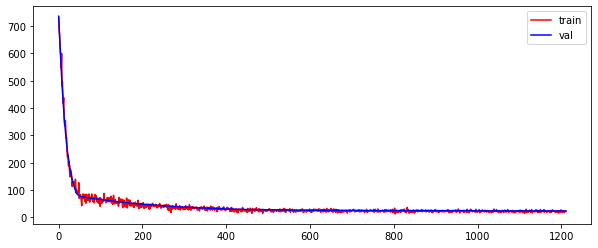

----------
minibatch:0/12
epoch:102--estimated_error:[24.25691843]--val_eror:[24.69069962]
minibatch:1/12
epoch:102--estimated_error:[26.00320731]--val_eror:[24.65286988]
minibatch:2/12
epoch:102--estimated_error:[23.41080969]--val_eror:[24.64933135]
minibatch:3/12
epoch:102--estimated_error:[24.09969675]--val_eror:[24.62905142]
minibatch:4/12
epoch:102--estimated_error:[25.85317815]--val_eror:[24.65625278]
minibatch:5/12
epoch:102--estimated_error:[21.10208768]--val_eror:[24.62140897]
minibatch:6/12
epoch:102--estimated_error:[18.21835386]--val_eror:[24.63494564]
minibatch:7/12
epoch:102--estimated_error:[21.81162799]--val_eror:[24.59953198]
minibatch:8/12
epoch:102--estimated_error:[25.84092696]--val_eror:[24.56893202]
minibatch:9/12
epoch:102--estimated_error:[18.78601028]--val_eror:[24.66538664]
minibatch:10/12
epoch:102--estimated_error:[24.45773995]--val_eror:[24.71323289]
minibatch:11/12
epoch:102--estimated_error:[21.61148023]--val_eror:[24.76342263]


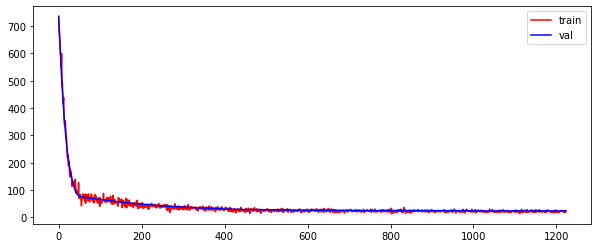

early stopping is activated


In [7]:
theta = simple_gd(eta = 0.000001, n_iters= 5000, lambda_= 0.99).fit(X,y.reshape(-1,1))

In [8]:
theta

array([[ 0.83297791],
       [ 0.81366488],
       [-0.15514254],
       [ 2.1644831 ],
       [ 1.62313874],
       [-0.69246935],
       [ 1.00403863],
       [ 0.81701054],
       [ 0.28019839],
       [-0.14701129],
       [ 0.43557362],
       [-0.06450752],
       [ 1.42407239]])